<a href="https://colab.research.google.com/github/Mahin934/ML-Repo-CSE-475/blob/main/CSE_475_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Mahin Mia

# ID: 2021-1-60-044

# Model Used: YOLOv11

## 1. The command !nvidia-smi is used to display the status of NVIDIA GPUs on a system.




In [ ]:
!nvidia-smi

Wed Jan  8 05:07:38 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 2. The command !pip install ultralytics is used to install the Ultralytics YOLO (You Only Look Once) library in your Python environment, typically in a Jupyter Notebook or Google Colab environment.

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 30.5 MB/s eta 0:00:00


##3.  Google Colab to mount your Google Drive to your Colab environment.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 4. The command you provided runs a YOLO-11 training task using the Ultralytics YOLO library.

In [ ]:
!yolo task=detect mode=train model=yolo11n.pt data=../content/drive/MyDrive/Datasets2/OcainData/data.yaml epochs=10 imgsz=640

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=../content/drive/MyDrive/Datasets2/OcainData/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

# 5.  Pretrained best.pt YOLO11n model

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/detect/train2/weights/best.pt")  # pretrained YOLO11n model

# 6. Run batched inference on a list of images

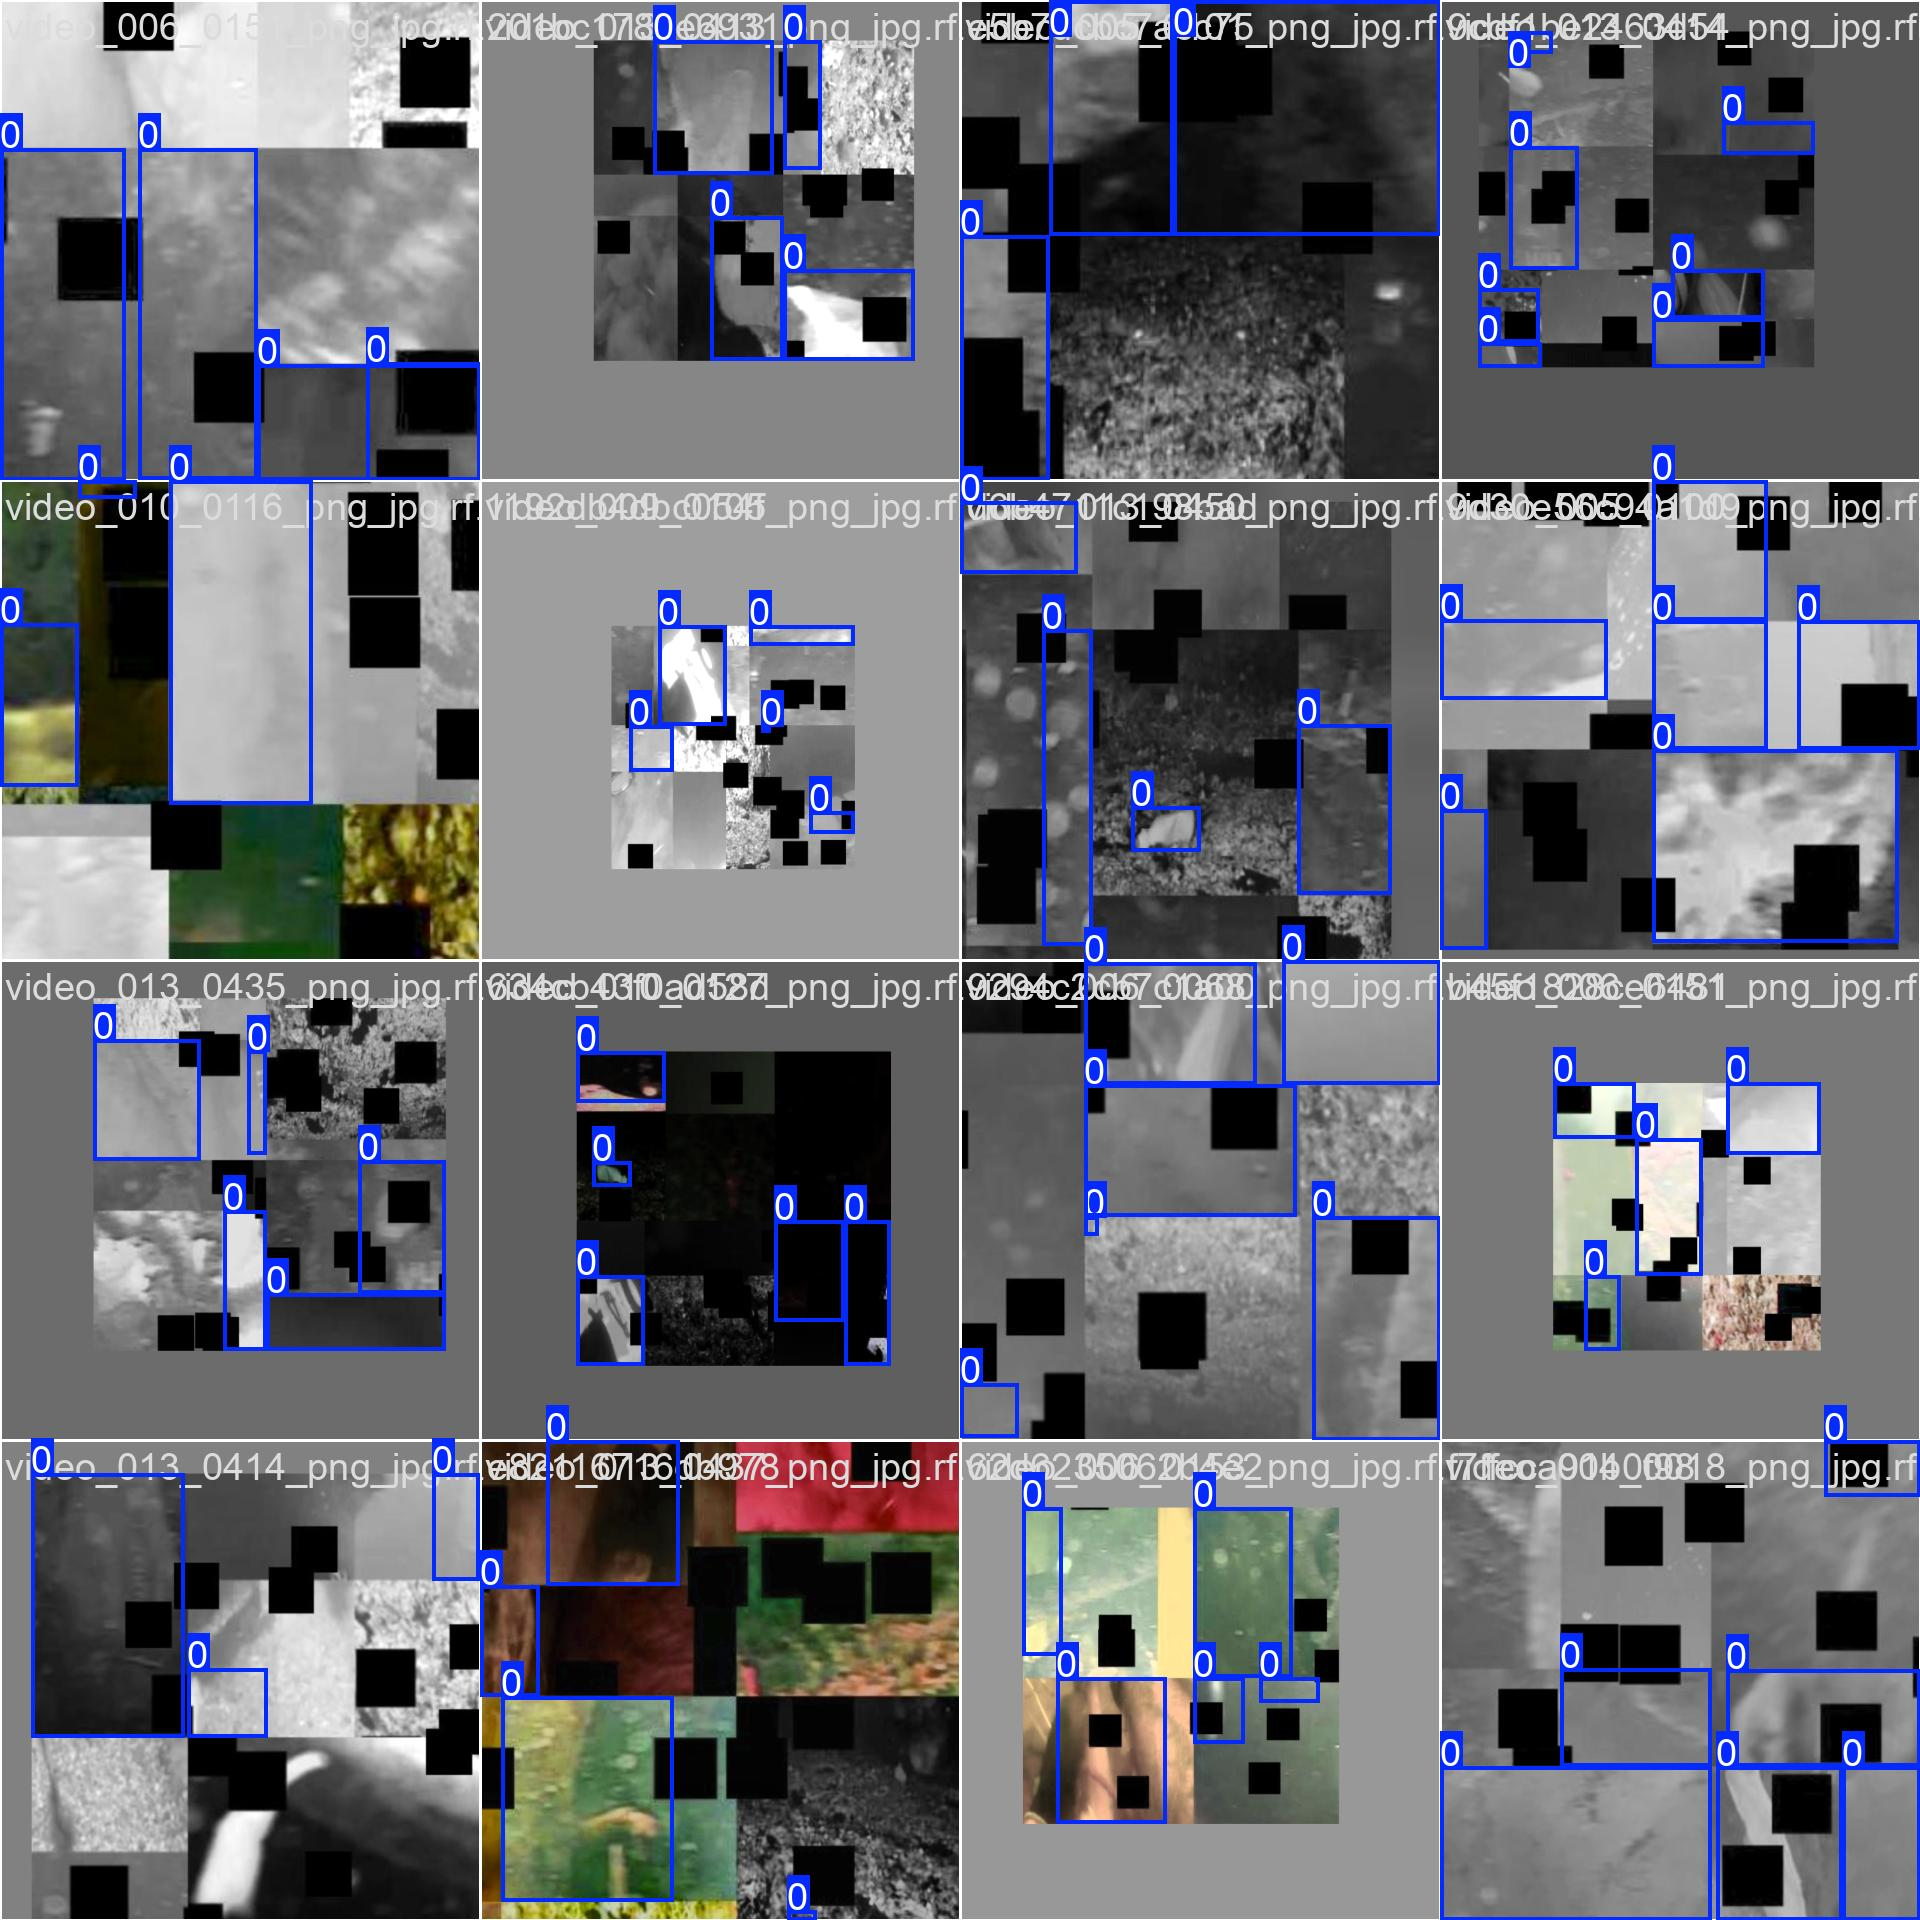

In [ ]:
from IPython.display import Image# Run batched inference on a list of images
Image("/content/runs/detect/train2/train_batch1.jpg" , width=600)

# 7. For working with online image URL and you can cpy any online image and paste here to get output of the image detection.

In [ ]:
# For working with online image URL

import requests
from PIL import Image
from io import BytesIO
def process_image_from_url(image_url, model):
    try:
        response = requests.get(image_url, stream=True)
        response.raise_for_status()

        image = Image.open(BytesIO(response.content))
        results = model(image, save=True)
        return results
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
        return None
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Enter the image URL
image_url = "https://infinitalab.com/wp-content/uploads/2023/11/90066.jpg"
# Process the image from the URL
results = process_image_from_url(image_url, model)


0: 320x640 1 plastic, 15.6ms
Speed: 2.7ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict


# 8. This is the output of online image taken from Google and shows the Plastic detection.

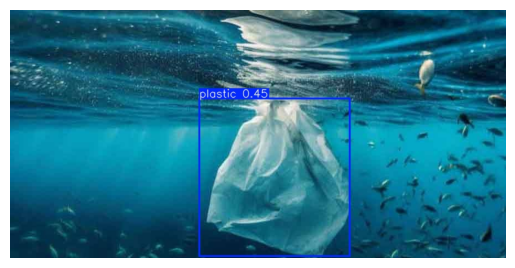


0: 320x640 1 plastic, 11.8ms
Speed: 2.7ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict


In [ ]:
# For working with online image URL

import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
def process_image_from_url(image_url, model,image_path):
    try:
        response = requests.get(image_url, stream=True)
        response.raise_for_status()

        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        image = Image.open(BytesIO(response.content))
        results = model(image, save=True)
        return results
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
        return None
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Enter the image URL
image_url = "https://infinitalab.com/wp-content/uploads/2023/11/90066.jpg"
image_path = "/content/runs/detect/predict/image0.jpg"
# Process the image from the URL
results = process_image_from_url(image_url, model,image_path)

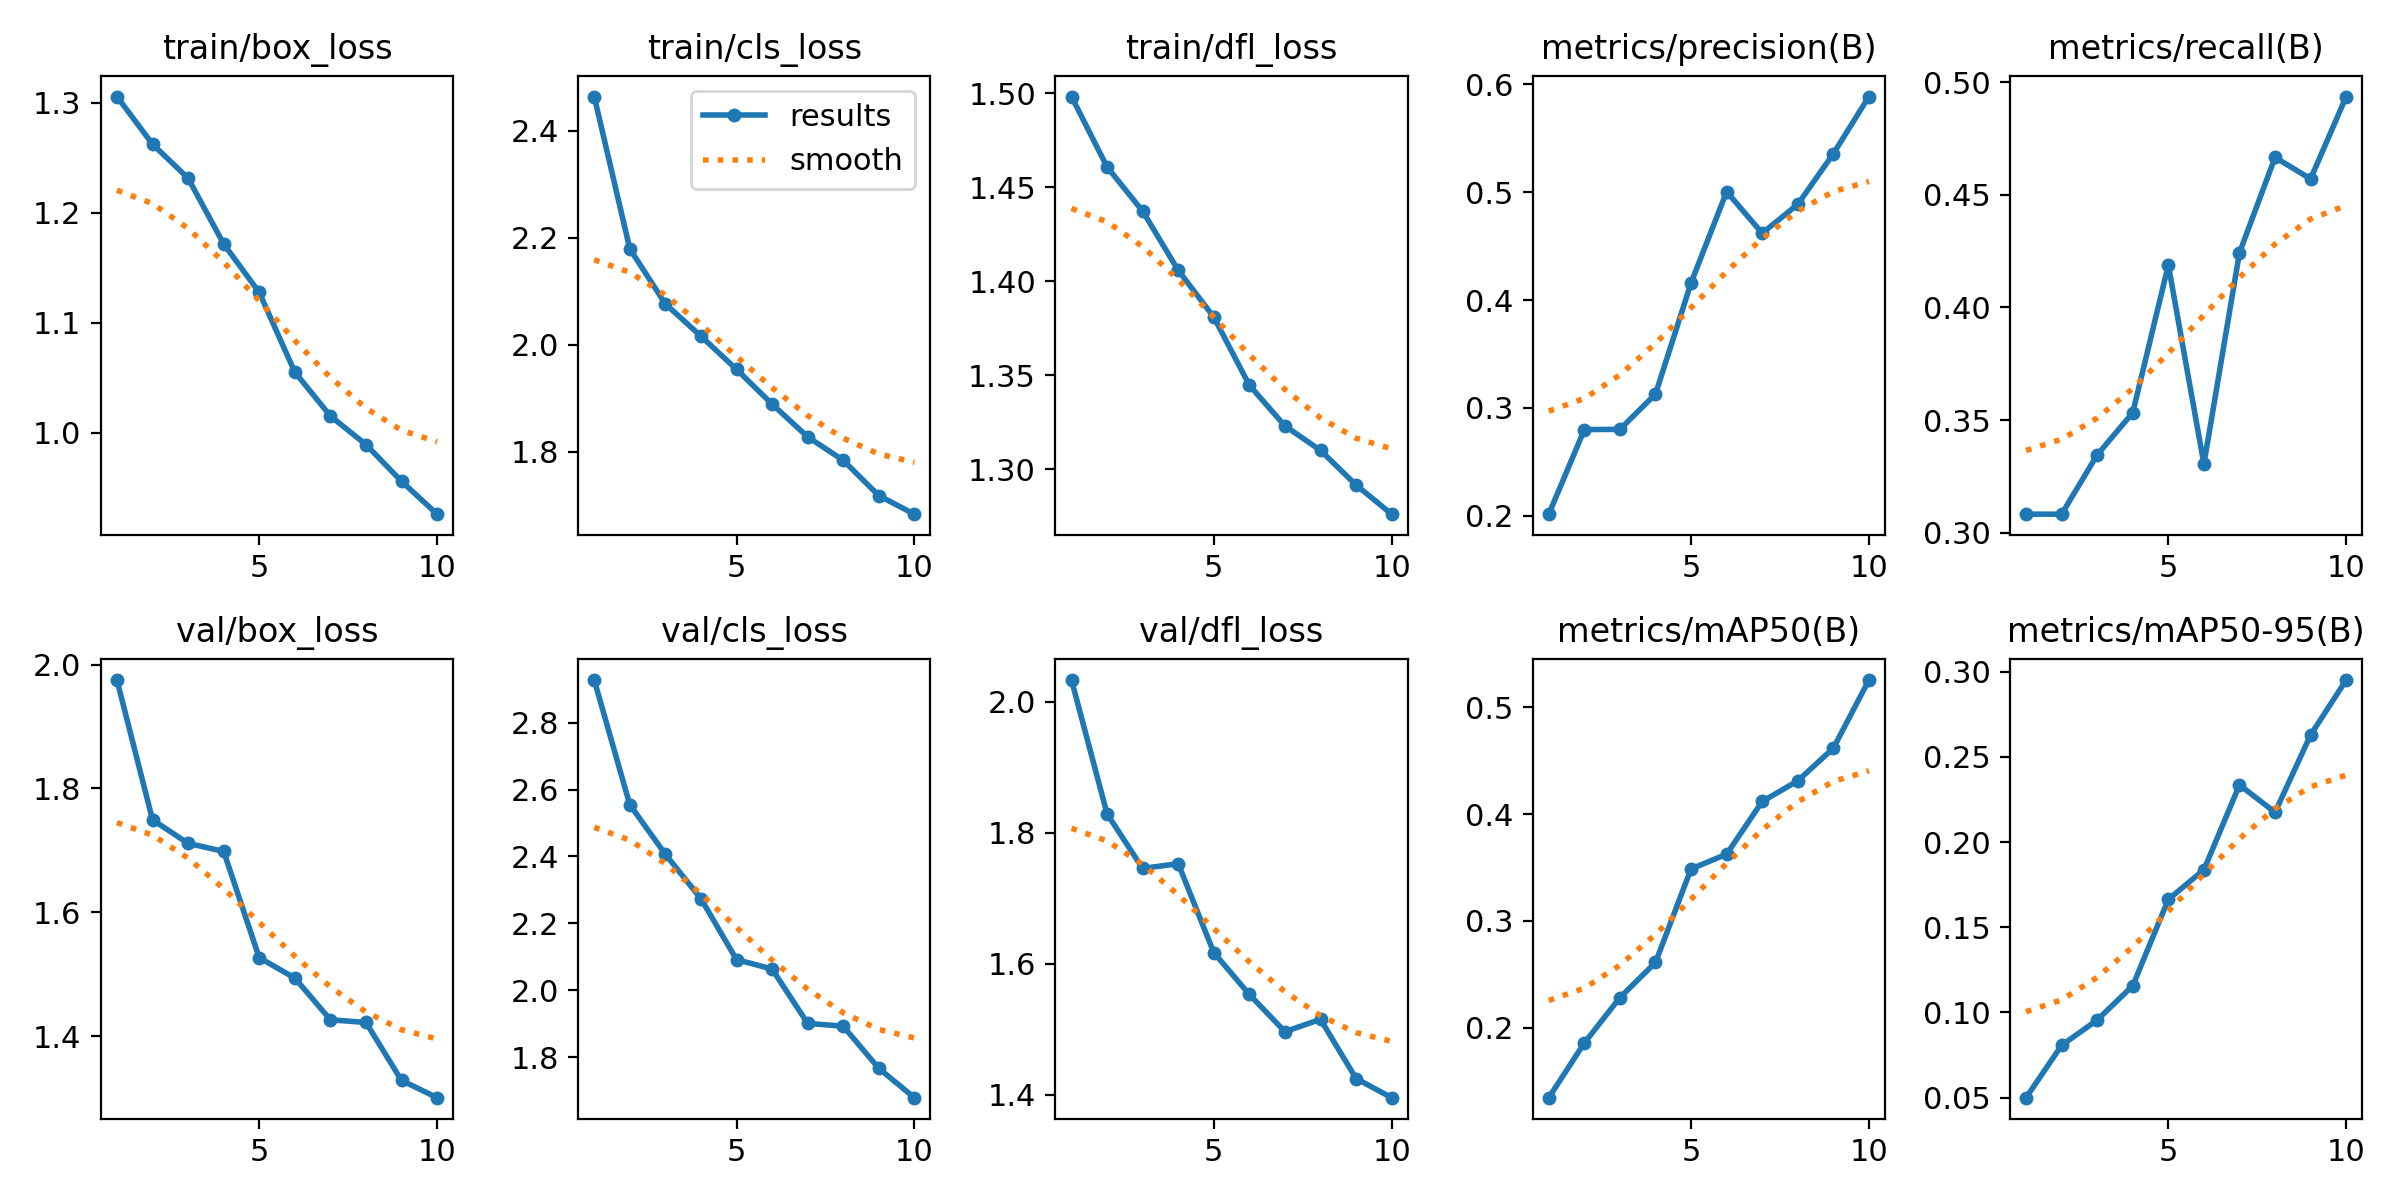

In [ ]:
from IPython.display import Image

# Display the image with a smaller size
Image("/content/runs/detect/train2/results.png", width=700)  # Adjust the width as needed

In [ ]:
import pandas as pd

# Load and display the CSV file
file_path = "/content/runs/detect/train2/results.csv"
df = pd.read_csv(file_path)

# Display the dataframe
df.head()  # Use .head() to show the first few rows, or simply df to show the entire content

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,74.1055,1.30582,2.46376,1.49815,0.20166,0.30832,0.13437,0.04997,1.97495,2.92779,2.03352,0.000662,0.000662,0.000662
1,2,143.5620,1.26249,2.17949,1.46071,0.27998,0.30832,0.18557,0.08069,1.74926,2.55483,1.82907,0.001198,0.001198,0.001198
2,3,207.8000,1.23148,2.07651,1.43724,0.28023,0.33463,0.22810,0.09555,1.71110,2.40657,1.74565,0.001601,0.001601,0.001601
3,4,273.4660,1.17169,2.01626,1.40578,0.31288,0.35334,0.26097,0.11566,1.69826,2.27360,1.75293,0.001406,0.001406,0.001406
4,5,336.4160,1.12752,1.95429,1.38094,0.41589,0.41883,0.34862,0.16631,1.52650,2.09155,1.61708,0.001208,0.001208,0.001208


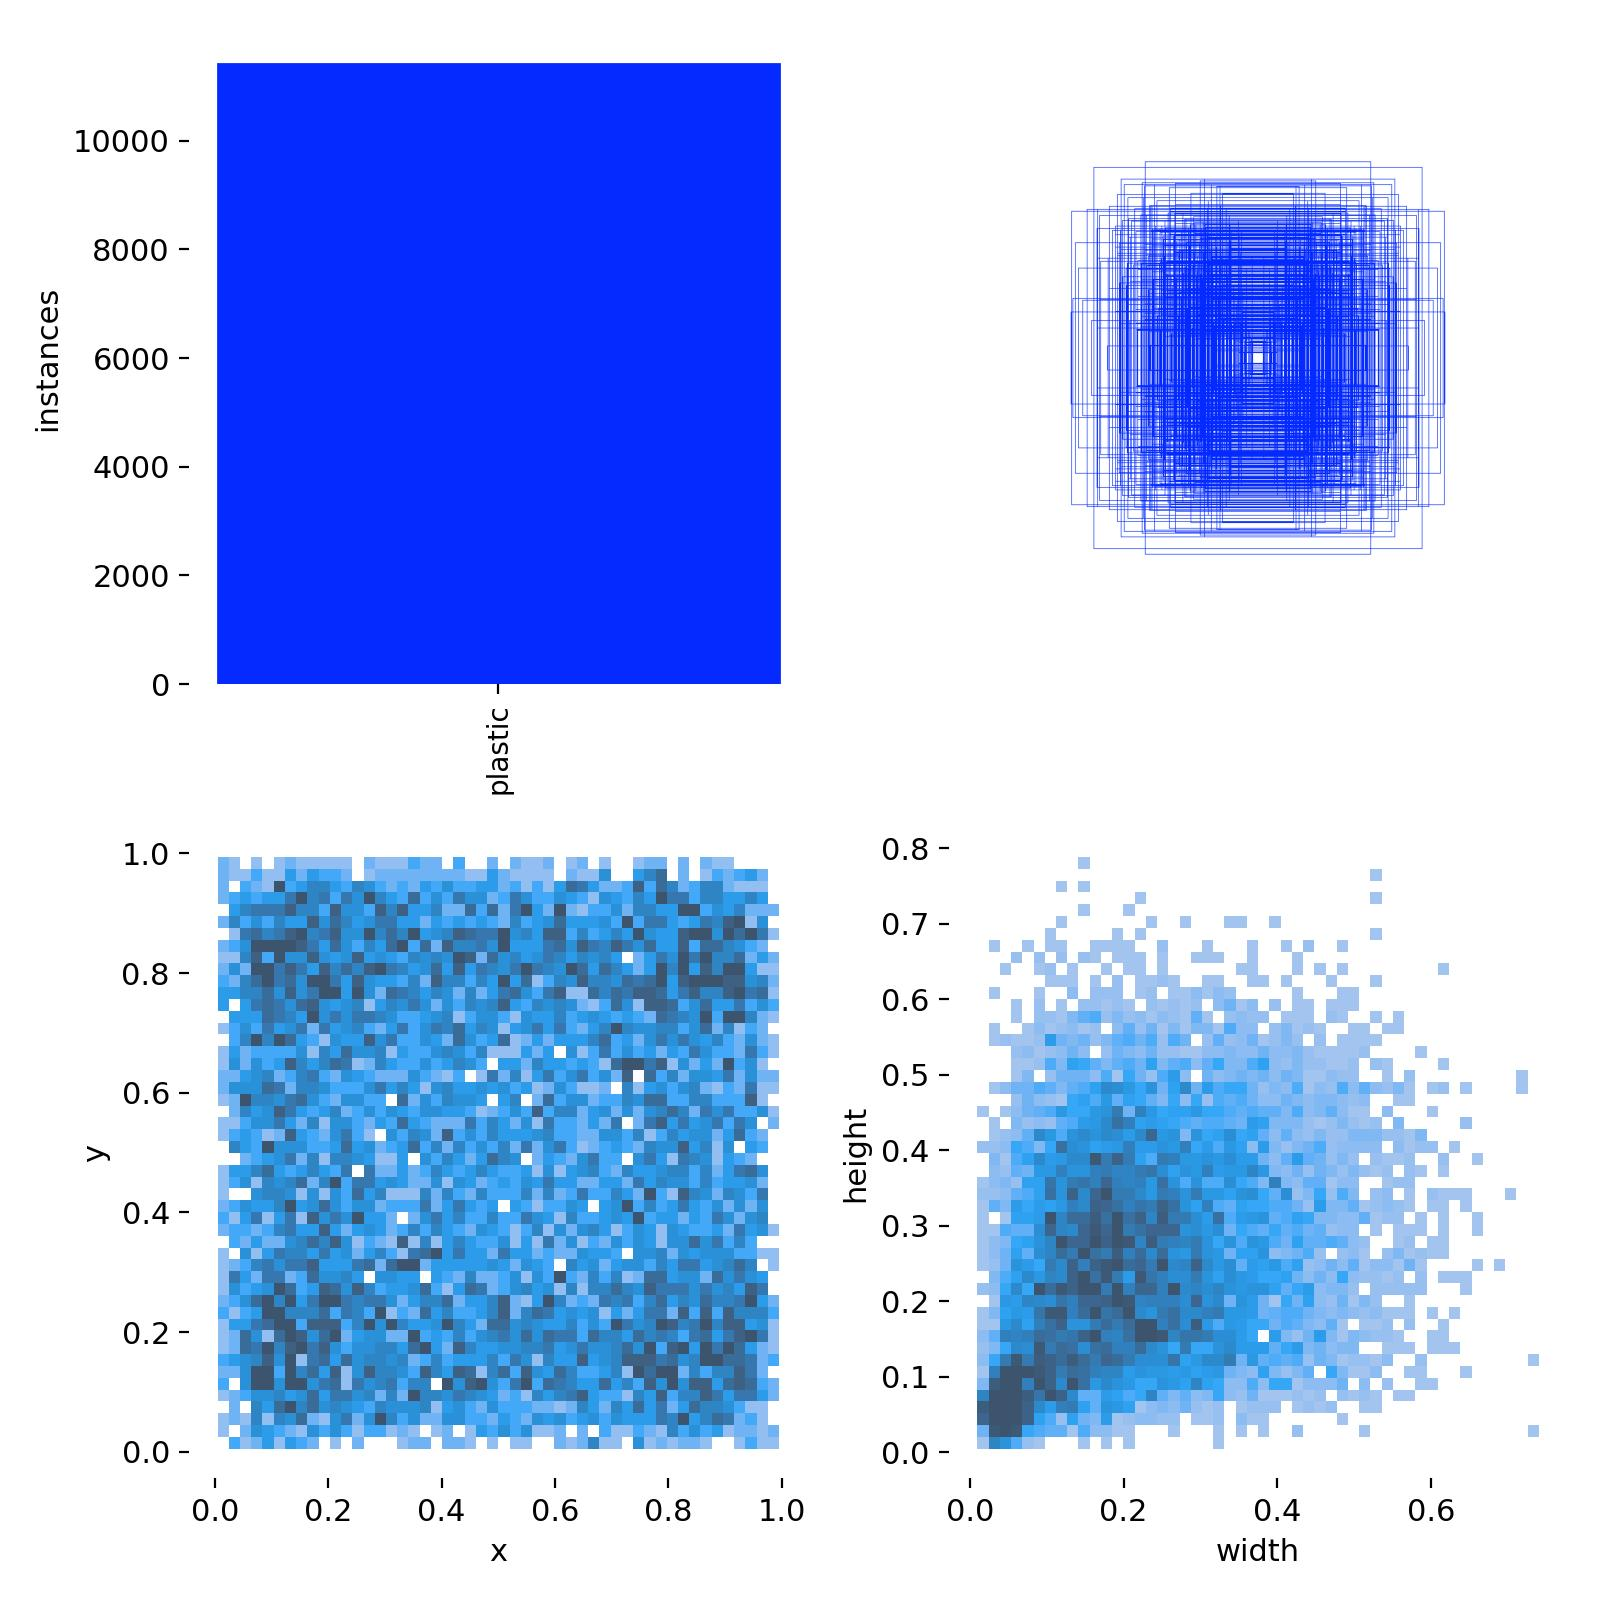

In [ ]:
from IPython.display import Image

# Display the image with a smaller size
Image("/content/runs/detect/train2/labels.jpg", width=500)  # Adjust the width as needed

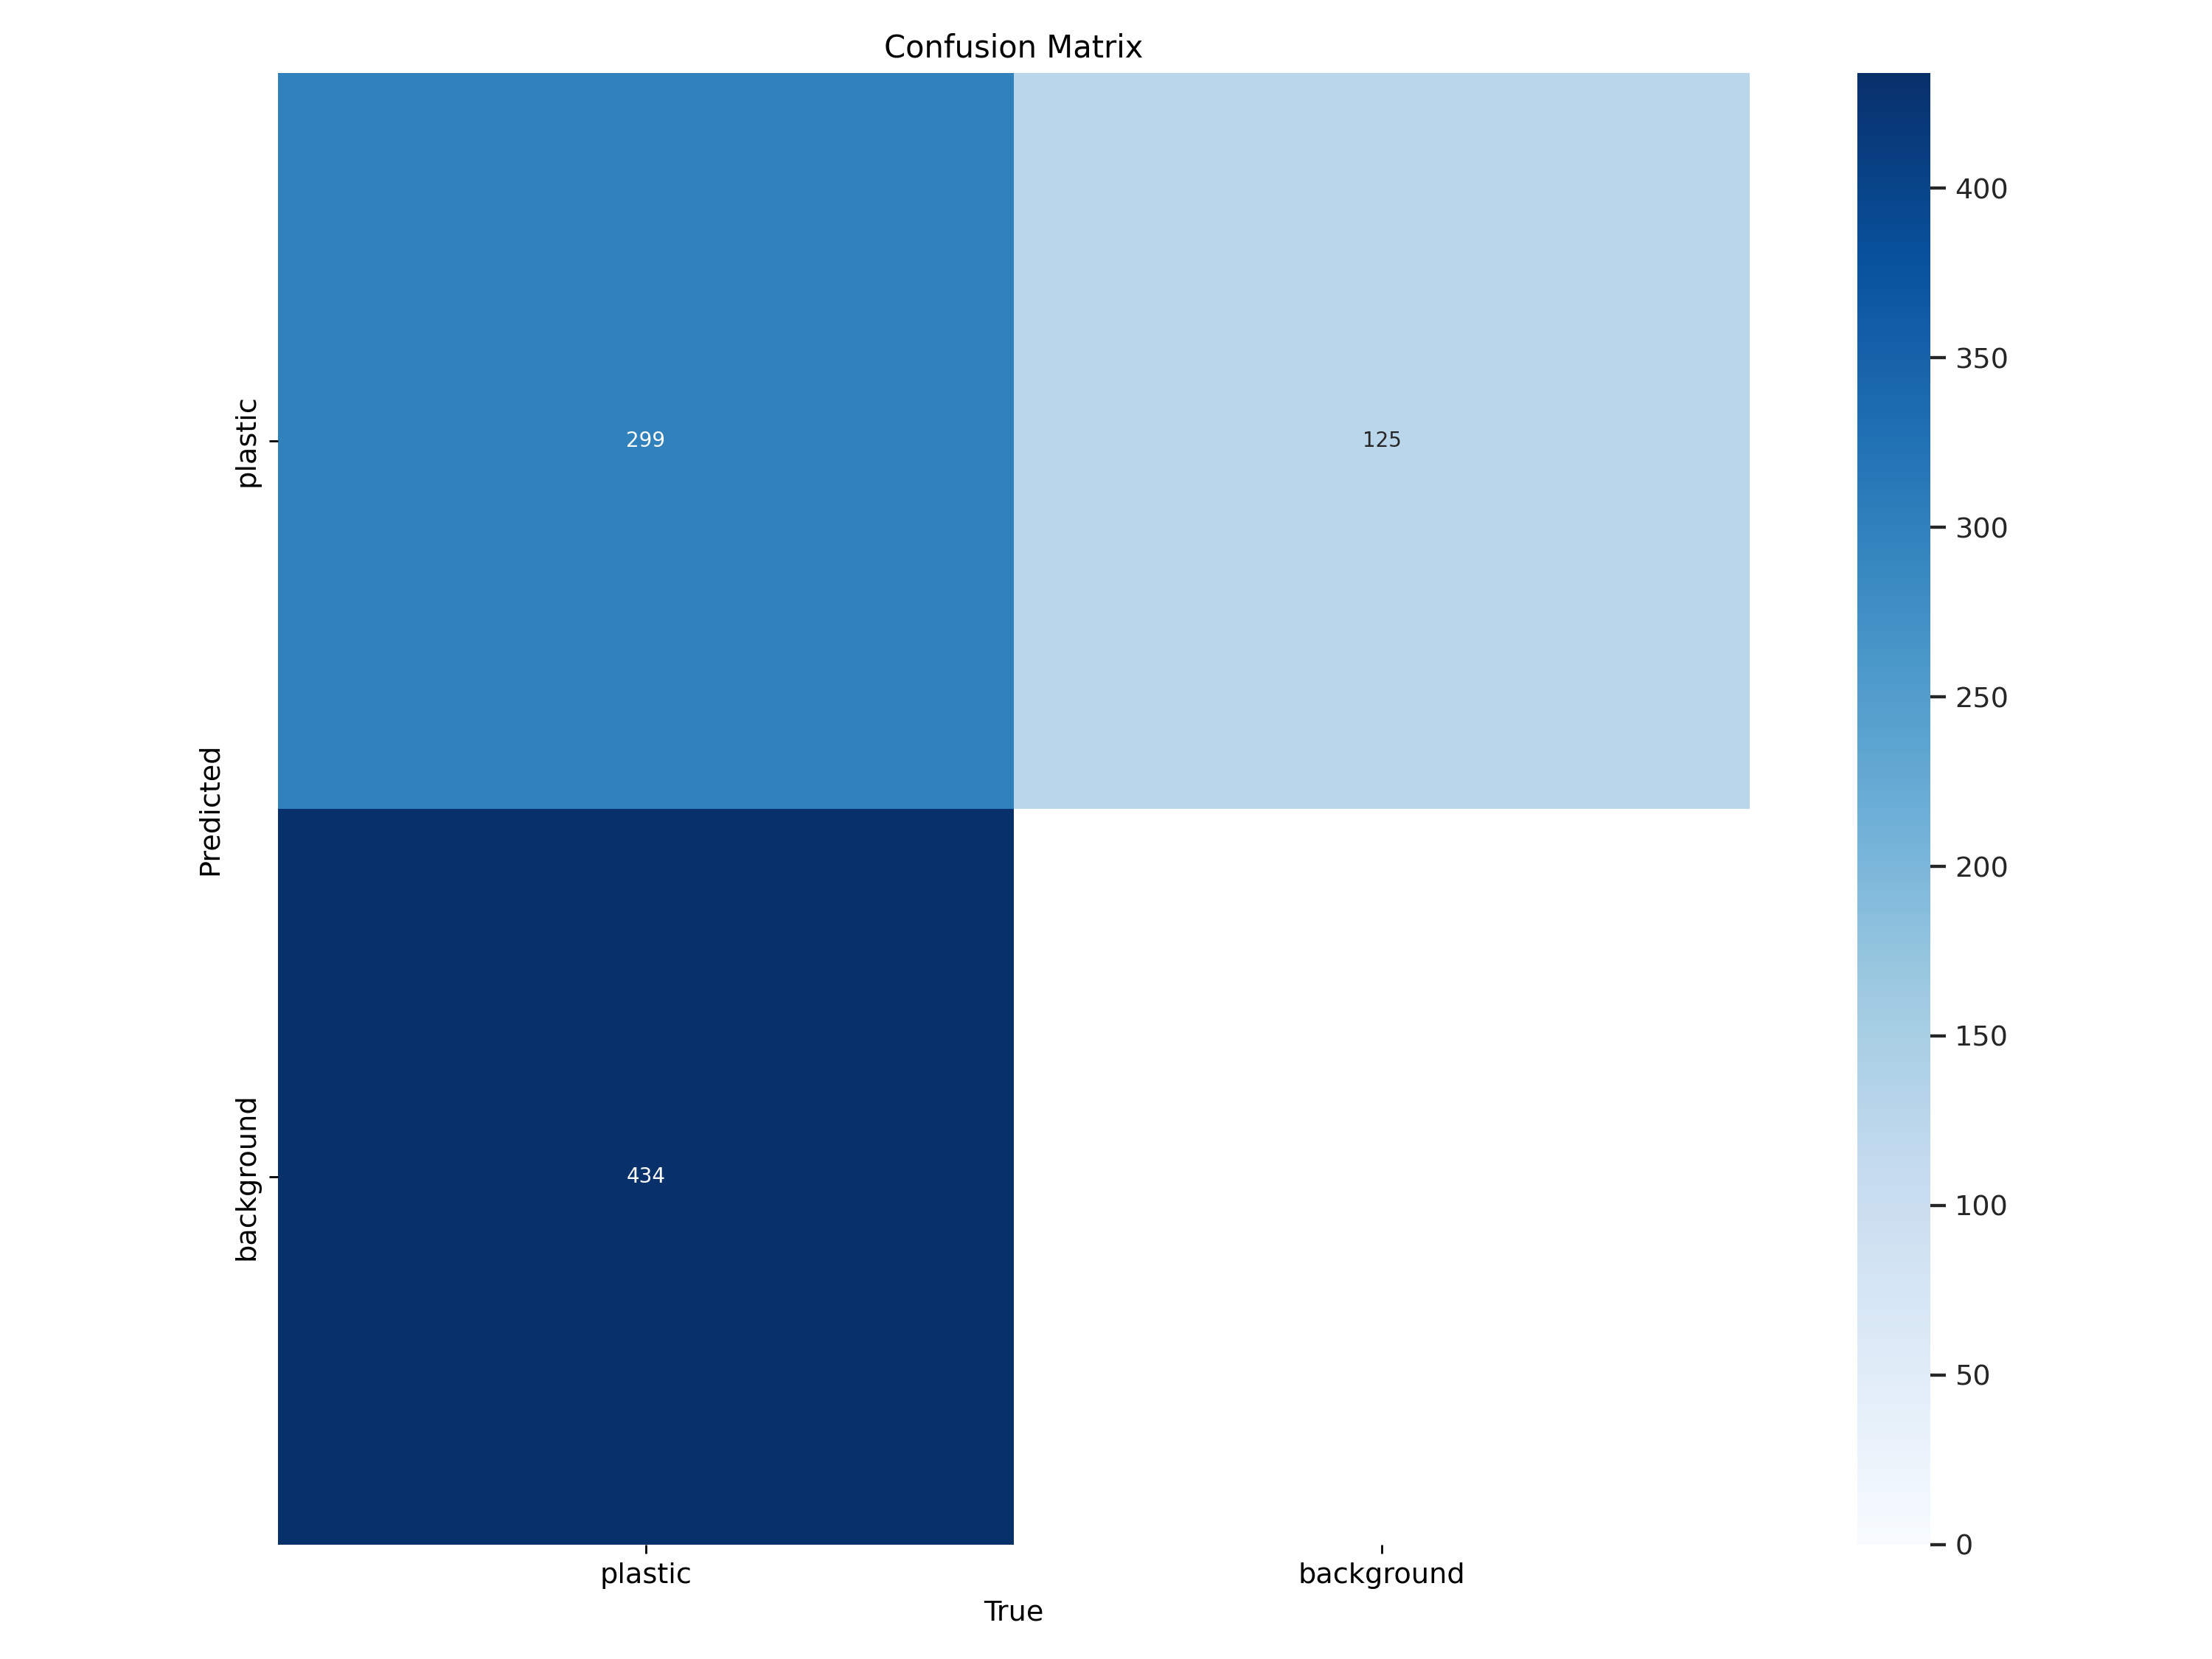

In [ ]:
from IPython.display import Image

# Display the image with a smaller size
Image("/content/runs/detect/train2/confusion_matrix.png", width=500)  # Adjust the width as needed

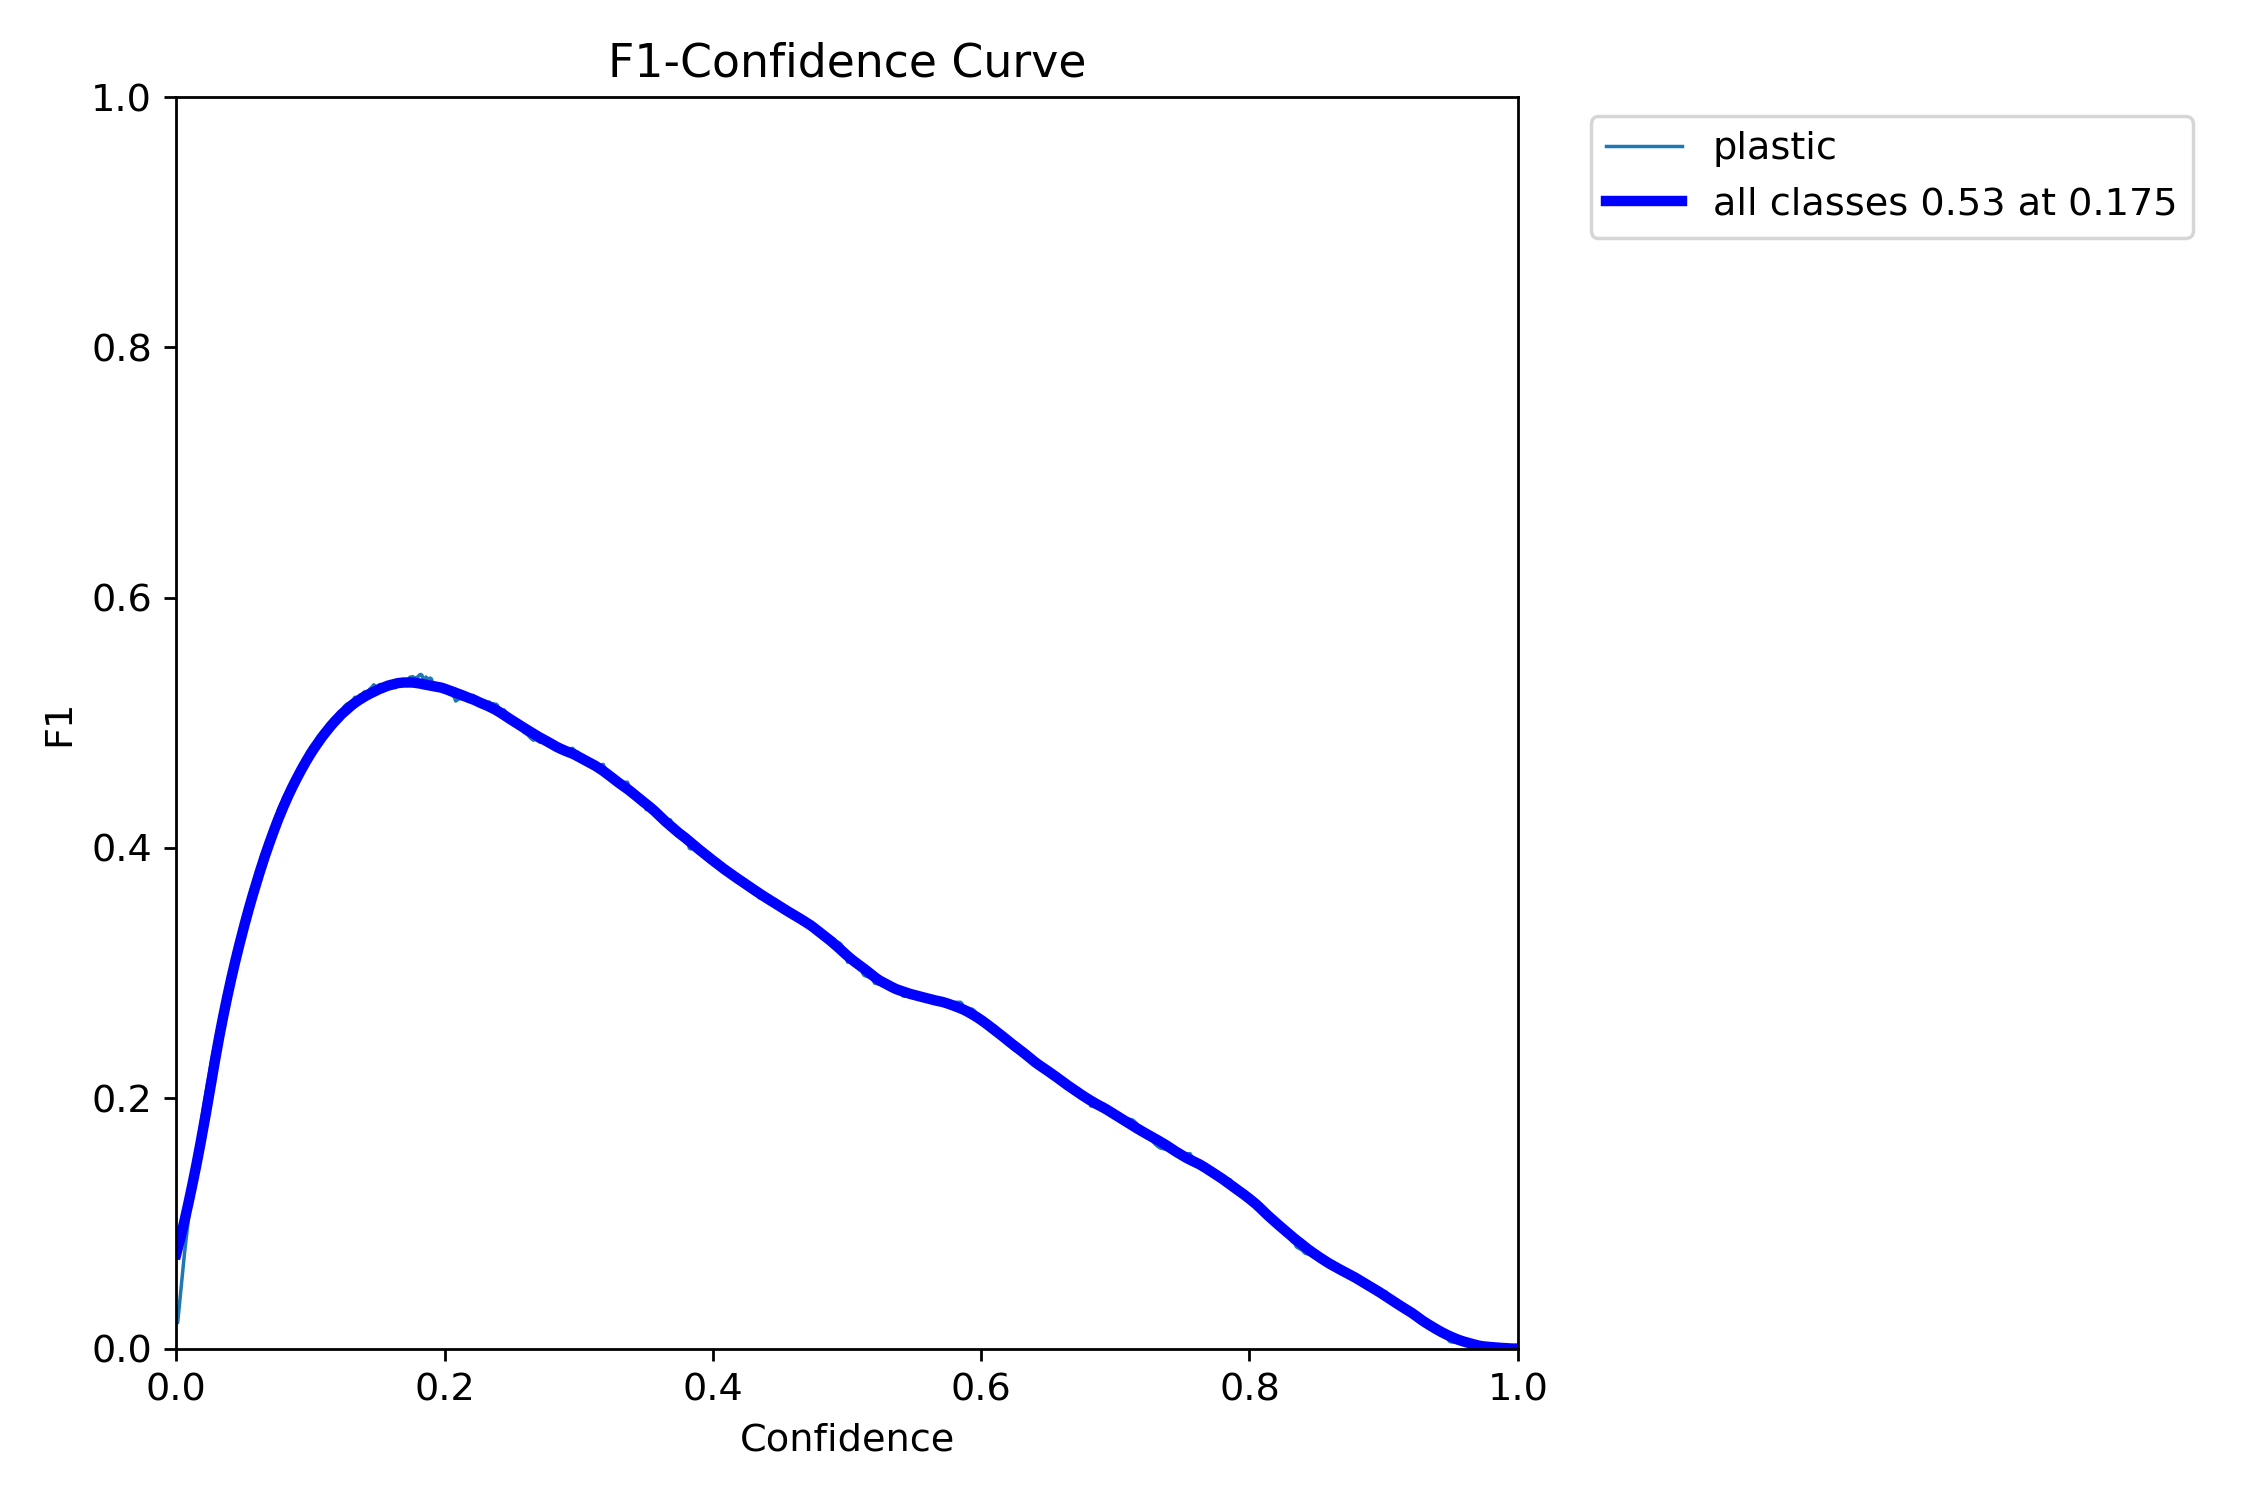

In [ ]:
from IPython.display import Image

# Display the image with a smaller size
Image("/content/runs/detect/train2/F1_curve.png", width=500)  # Adjust the width as needed


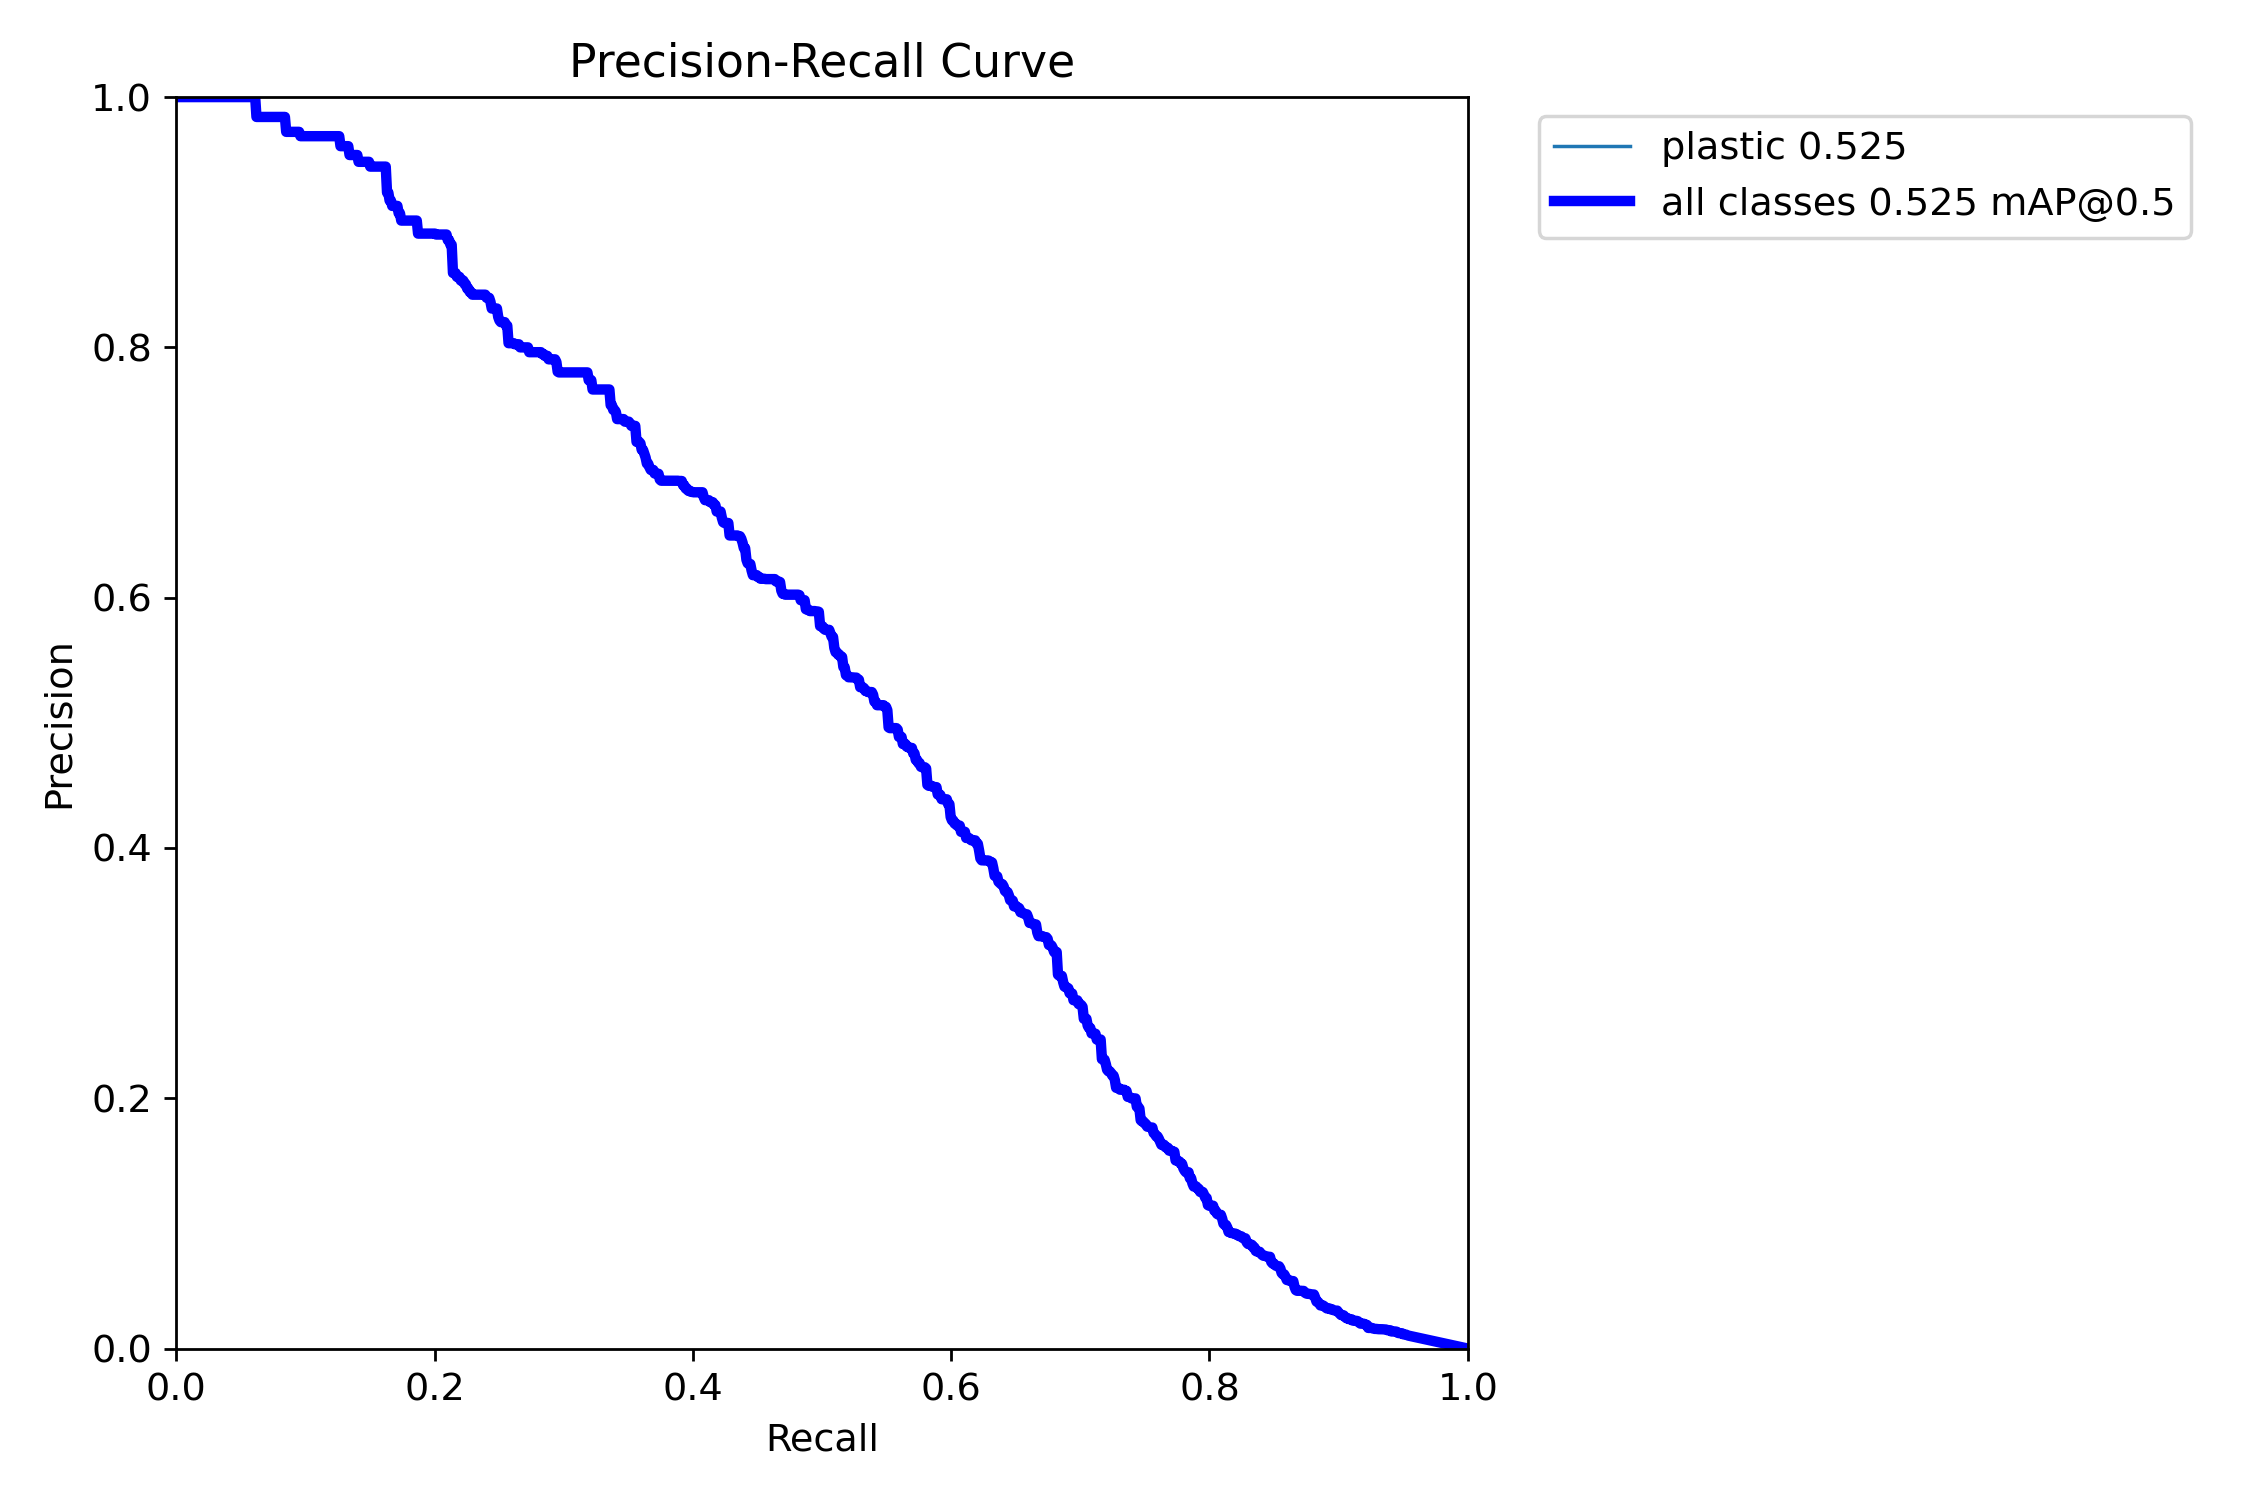

In [ ]:
from IPython.display import Image

# Display the image with a smaller size
Image("/content/runs/detect/train2/PR_curve.png", width=500)  # Adjust the width as needed


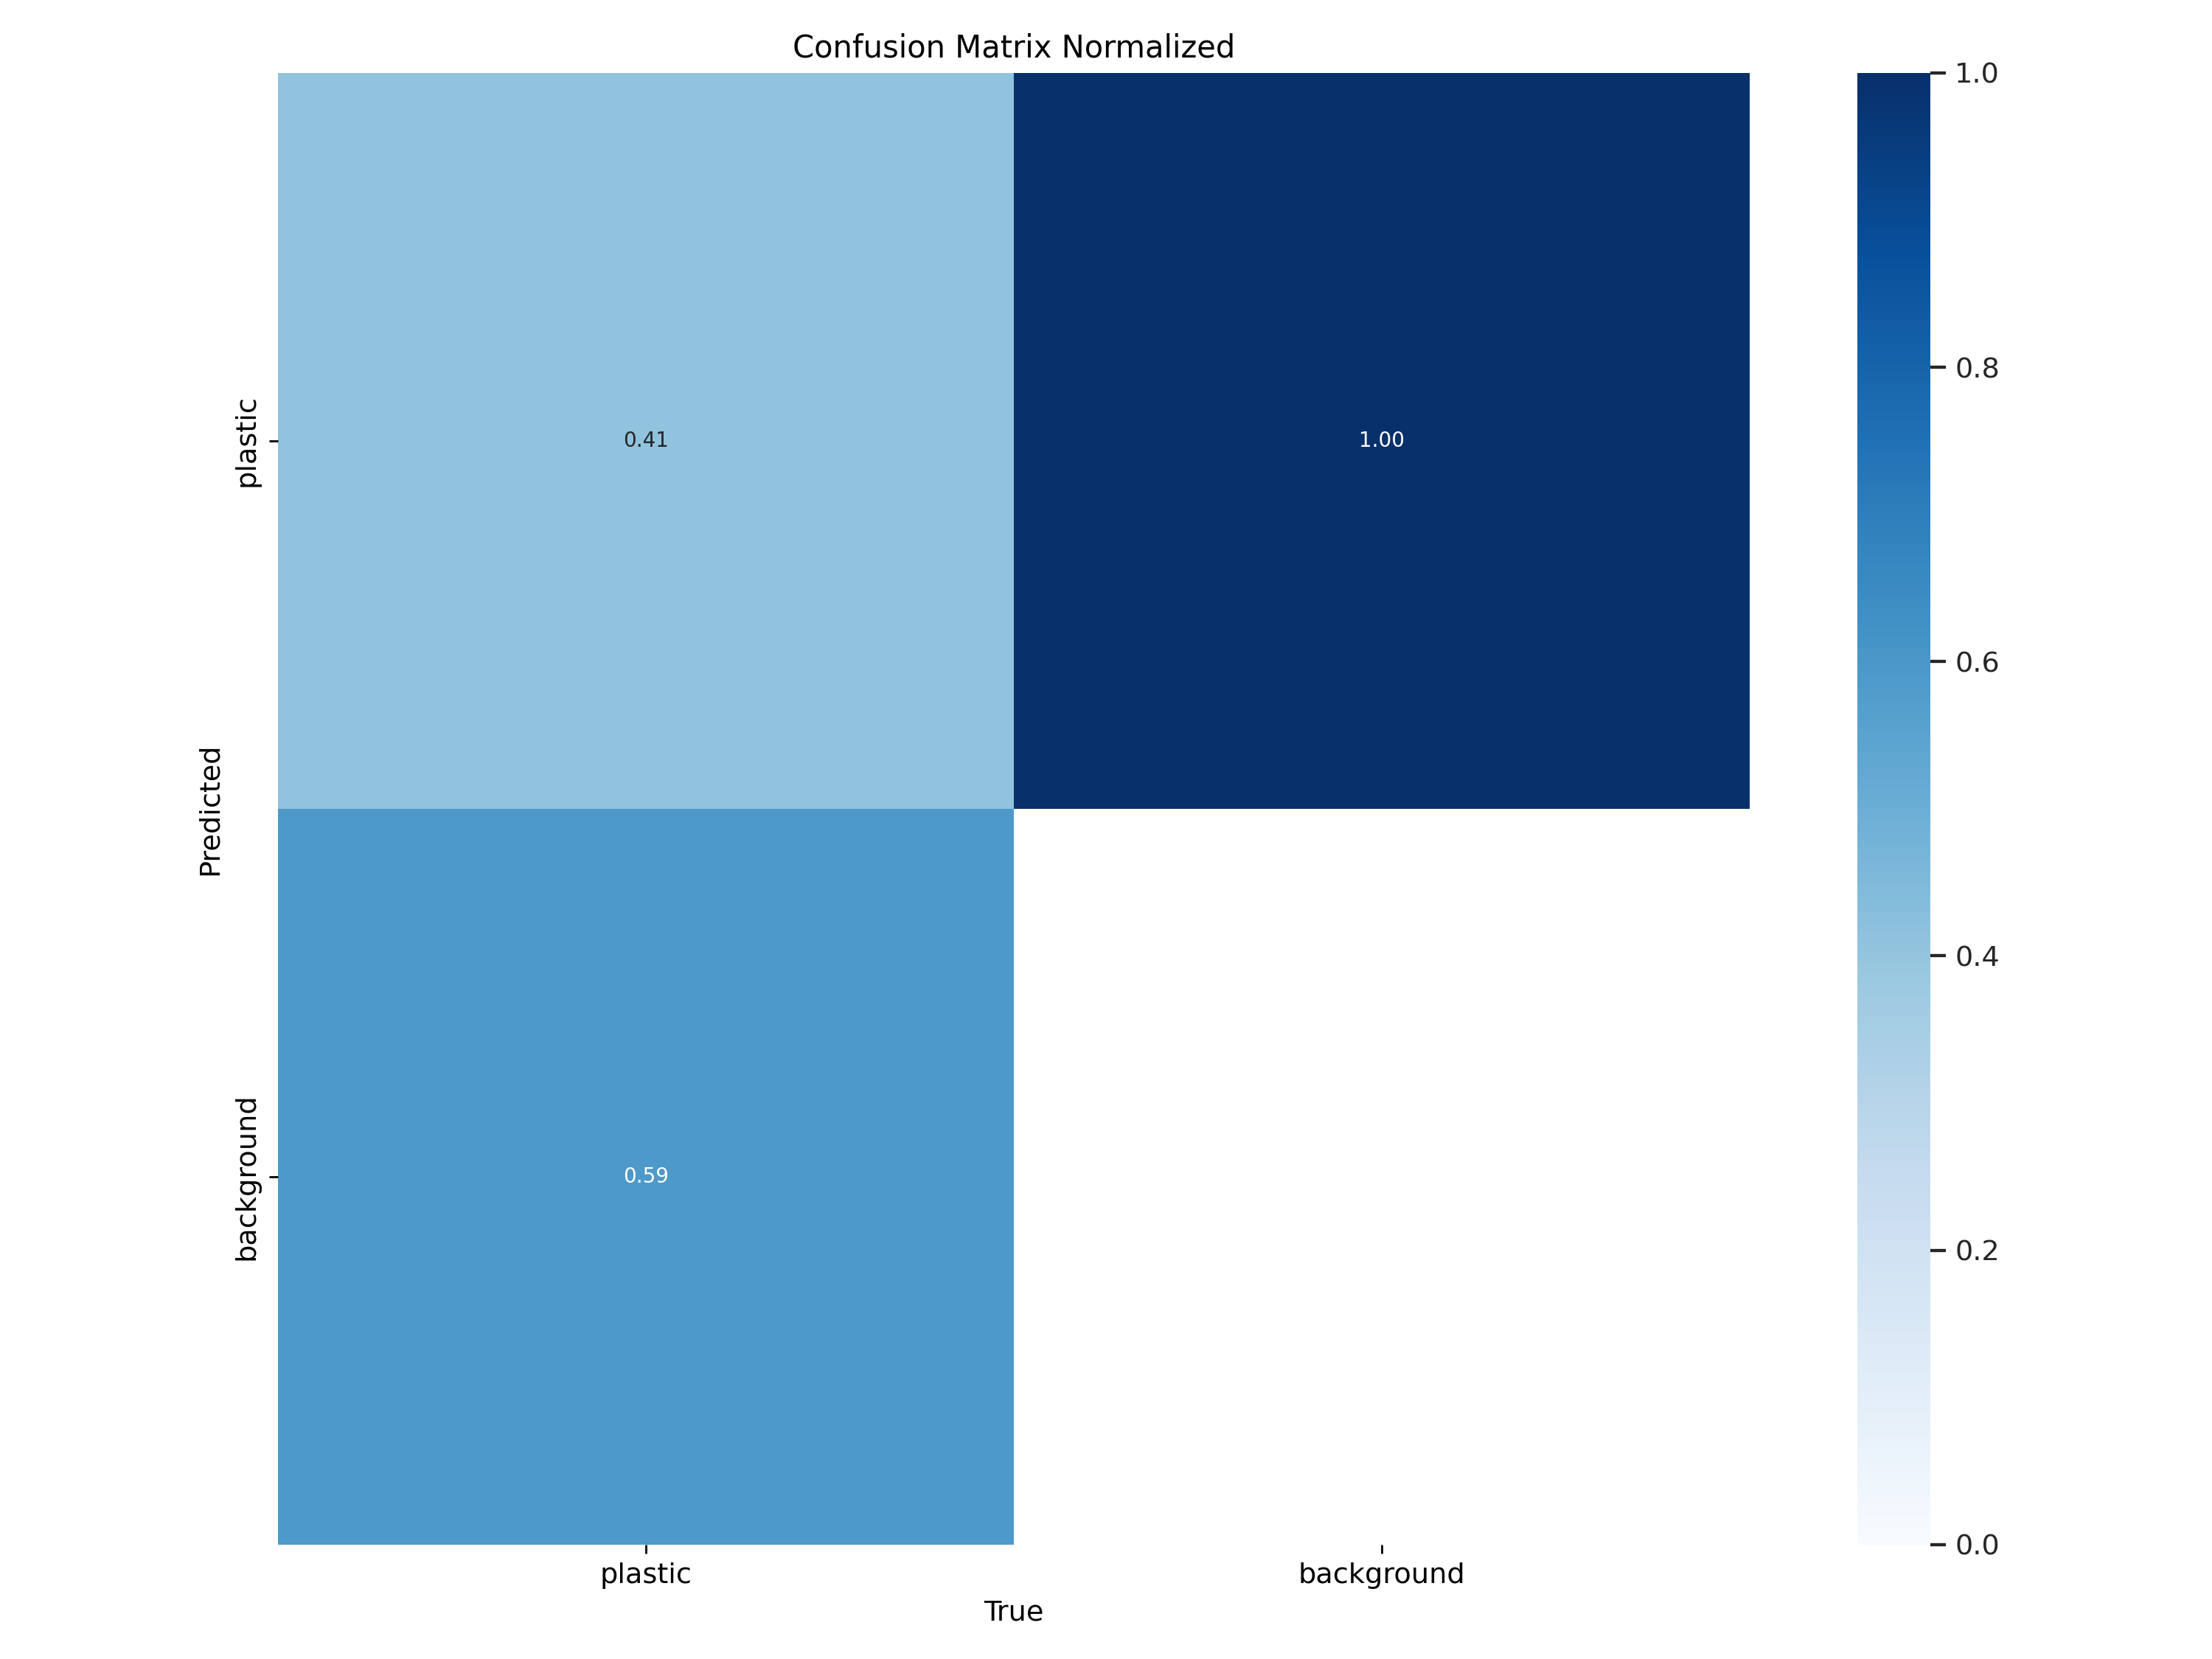

In [ ]:
from IPython.display import Image

# Display the image with a smaller size
Image("/content/runs/detect/train2/confusion_matrix_normalized.png", width=500)  # Adjust the width as needed


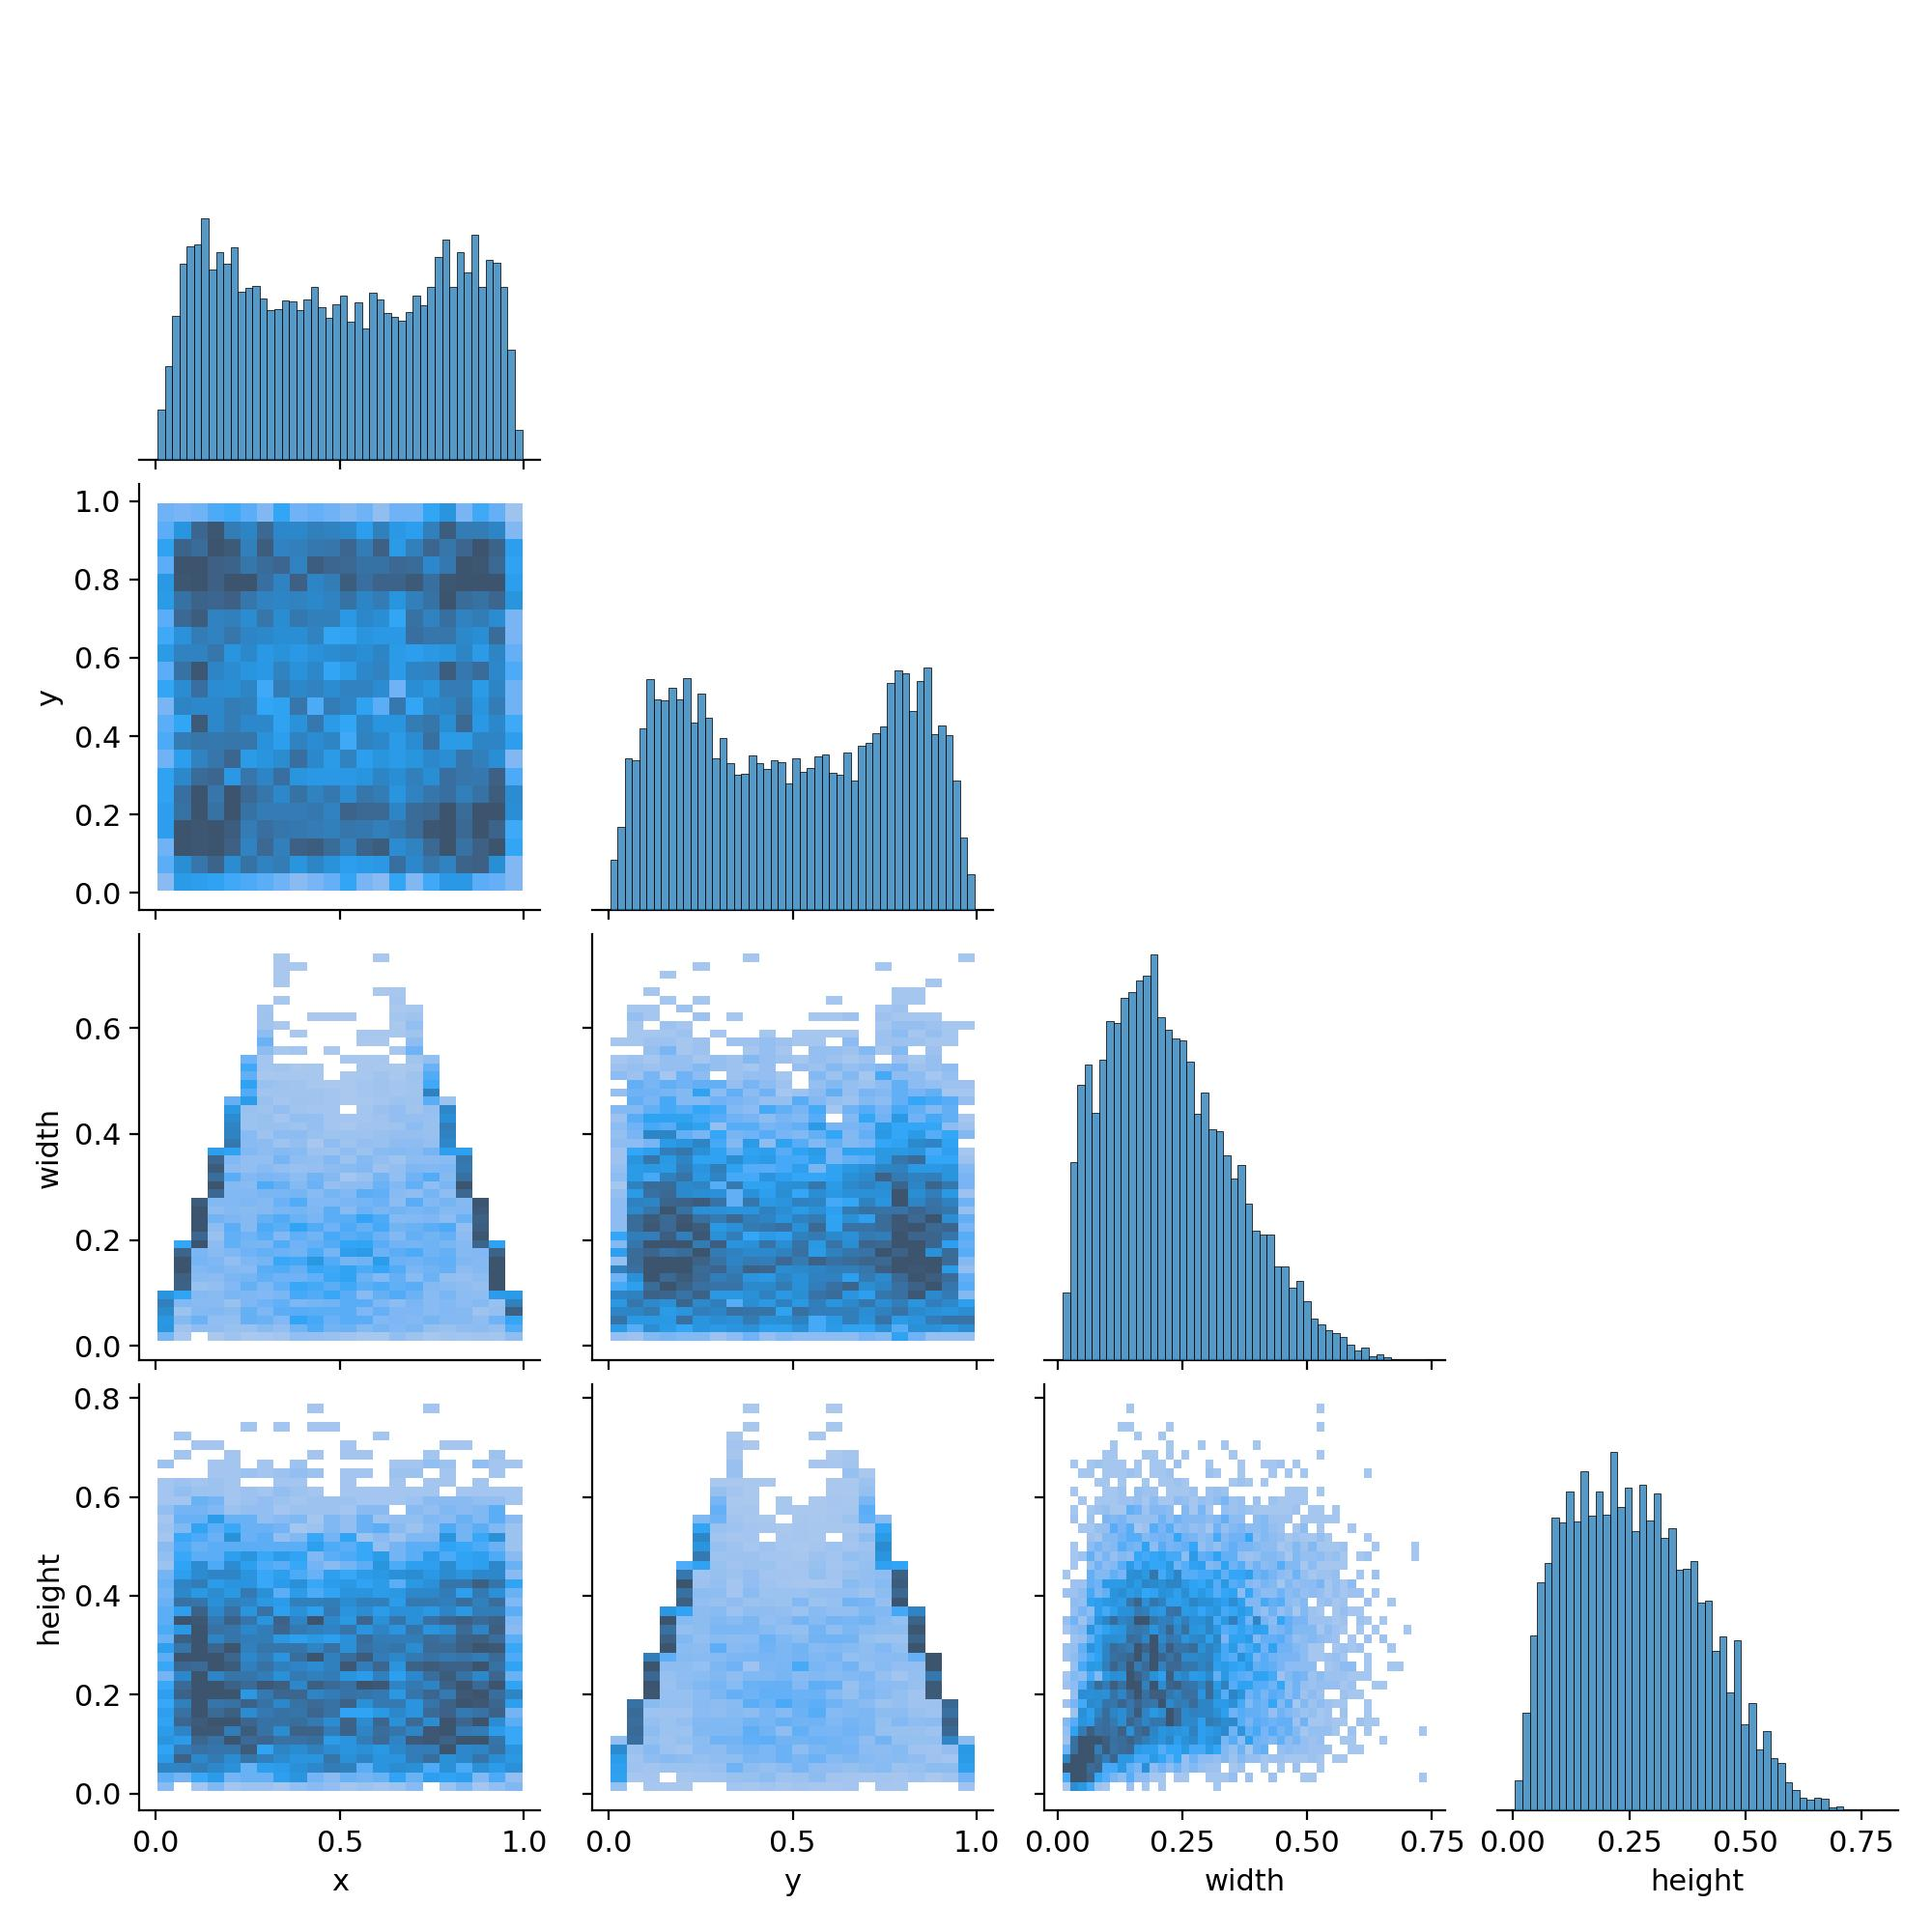

In [ ]:
from IPython.display import Image

# Display the image with a smaller size
Image("/content/runs/detect/train2/labels_correlogram.jpg", width=500)  # Adjust the width as needed


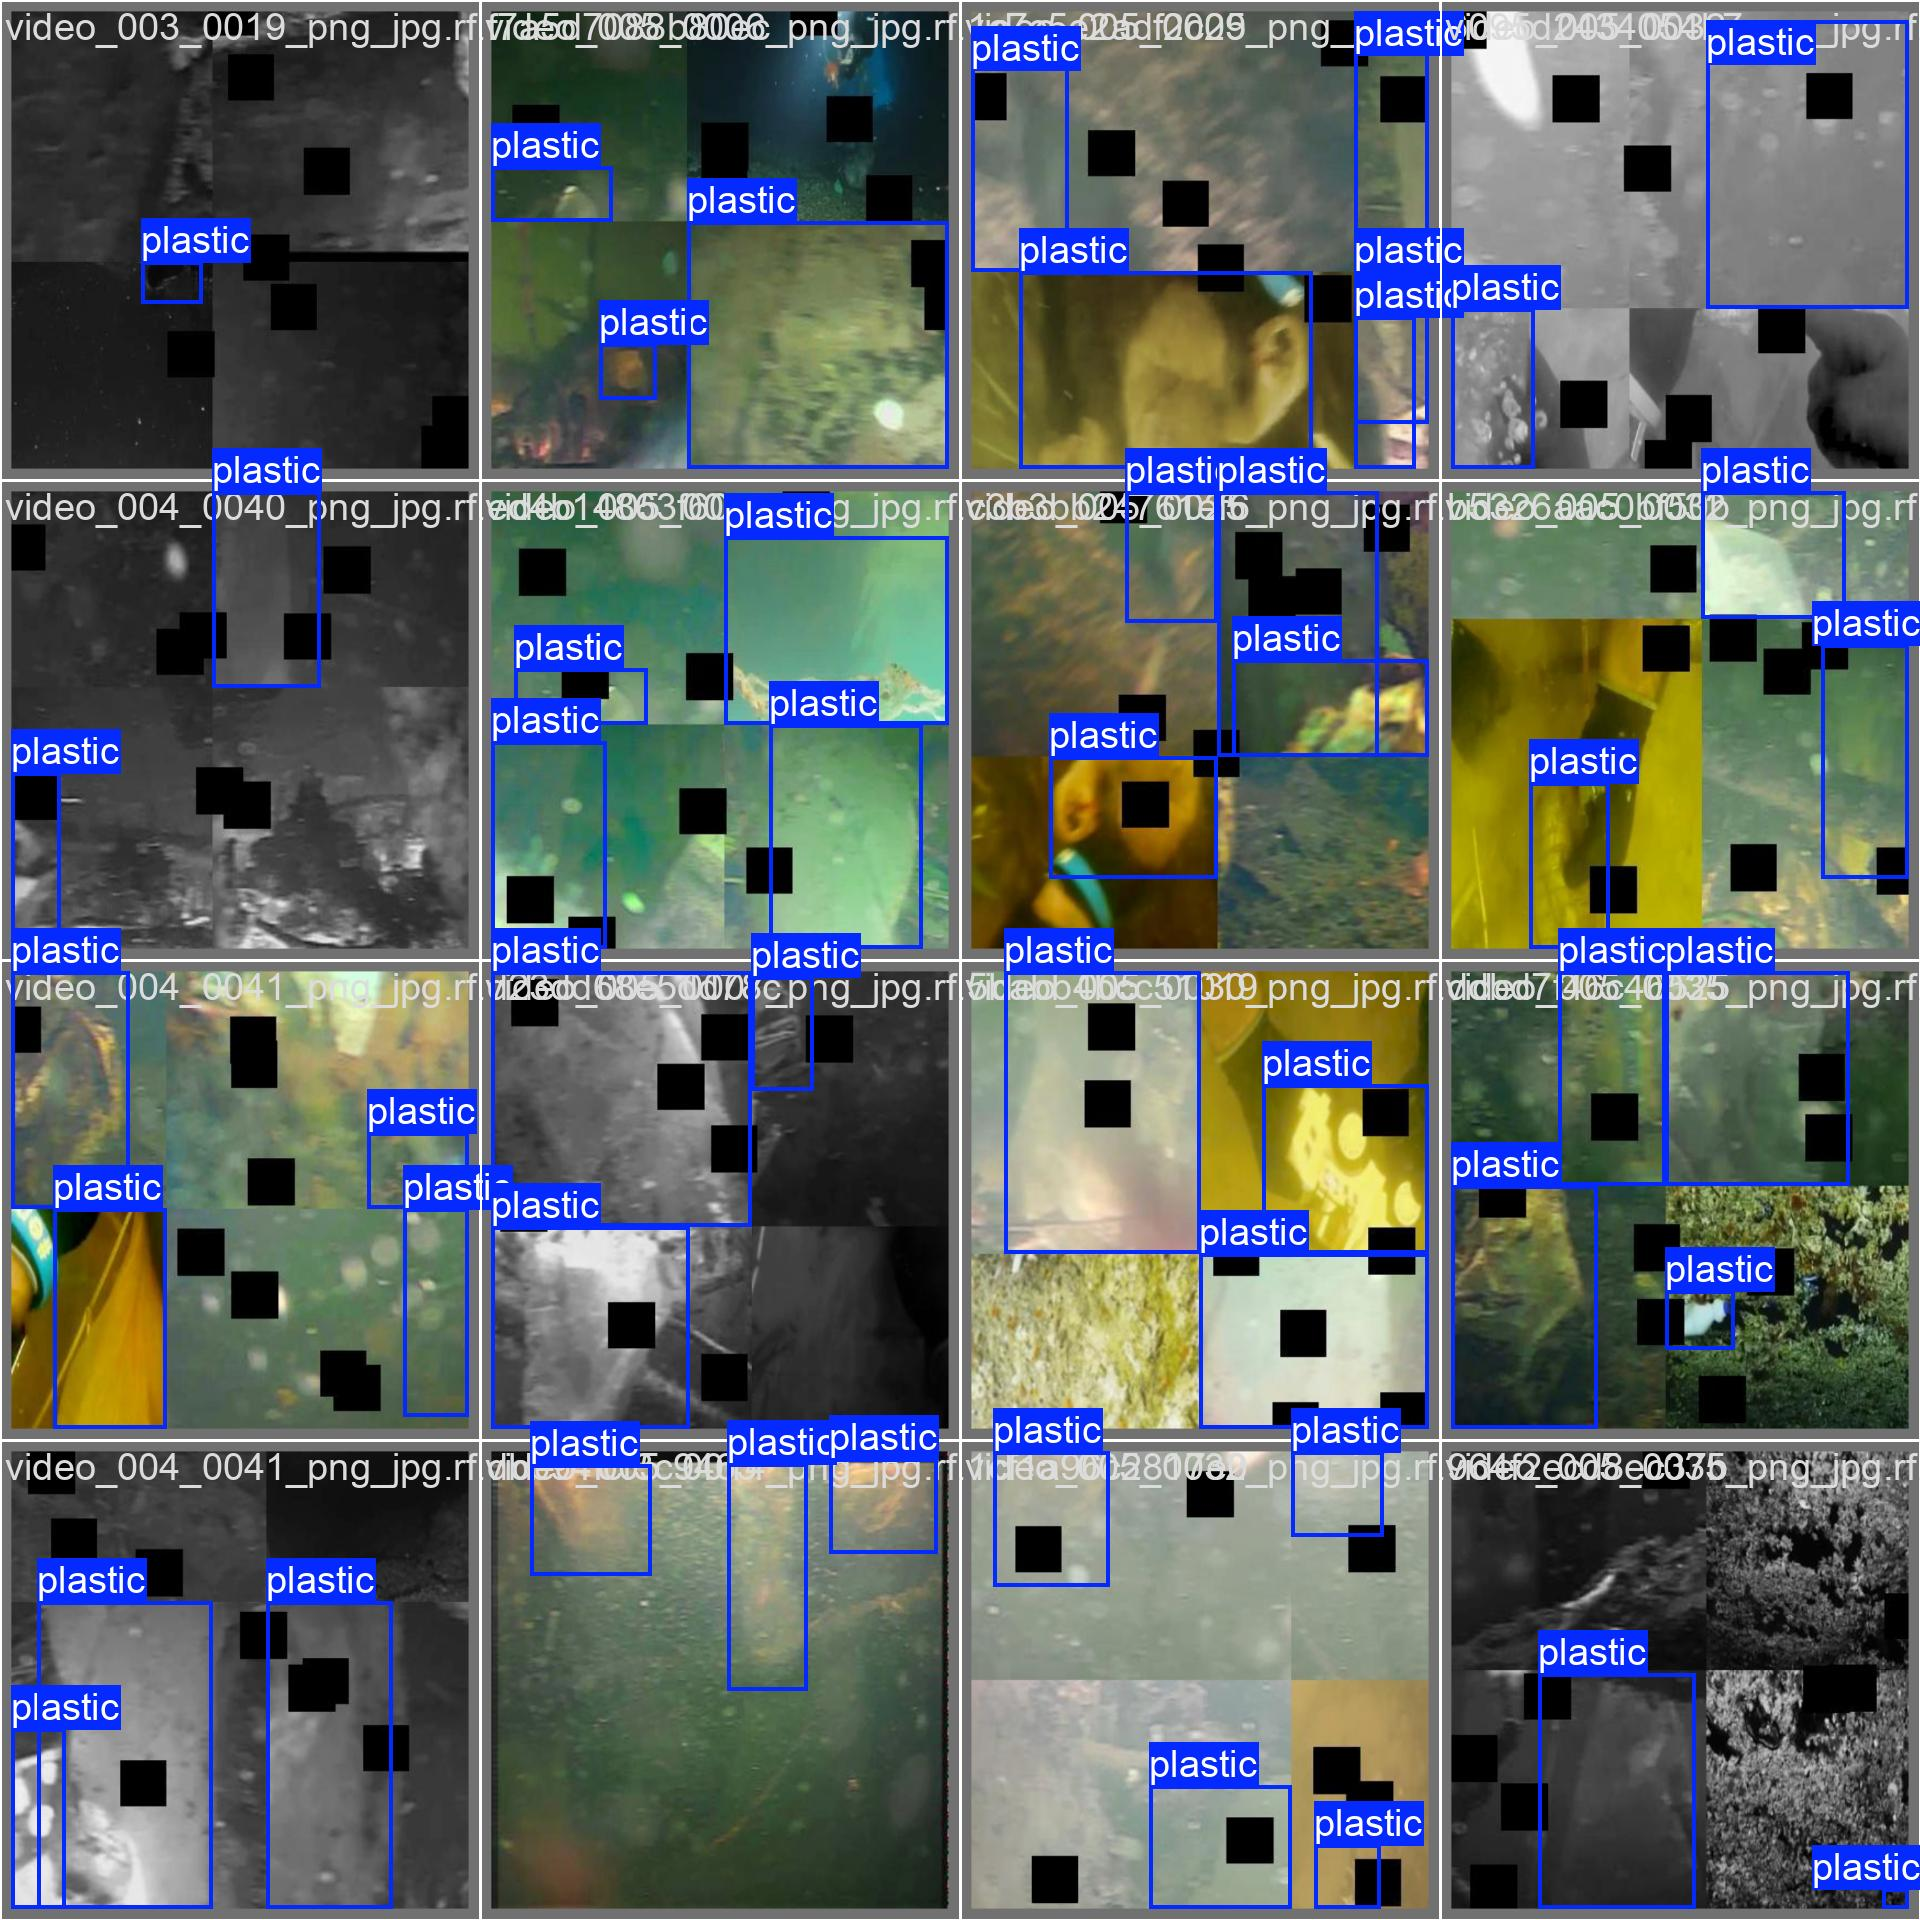

In [ ]:
from IPython.display import Image

# Display the image with a smaller size
Image("/content/runs/detect/train2/val_batch1_labels.jpg", width=500)  # Adjust the width as needed


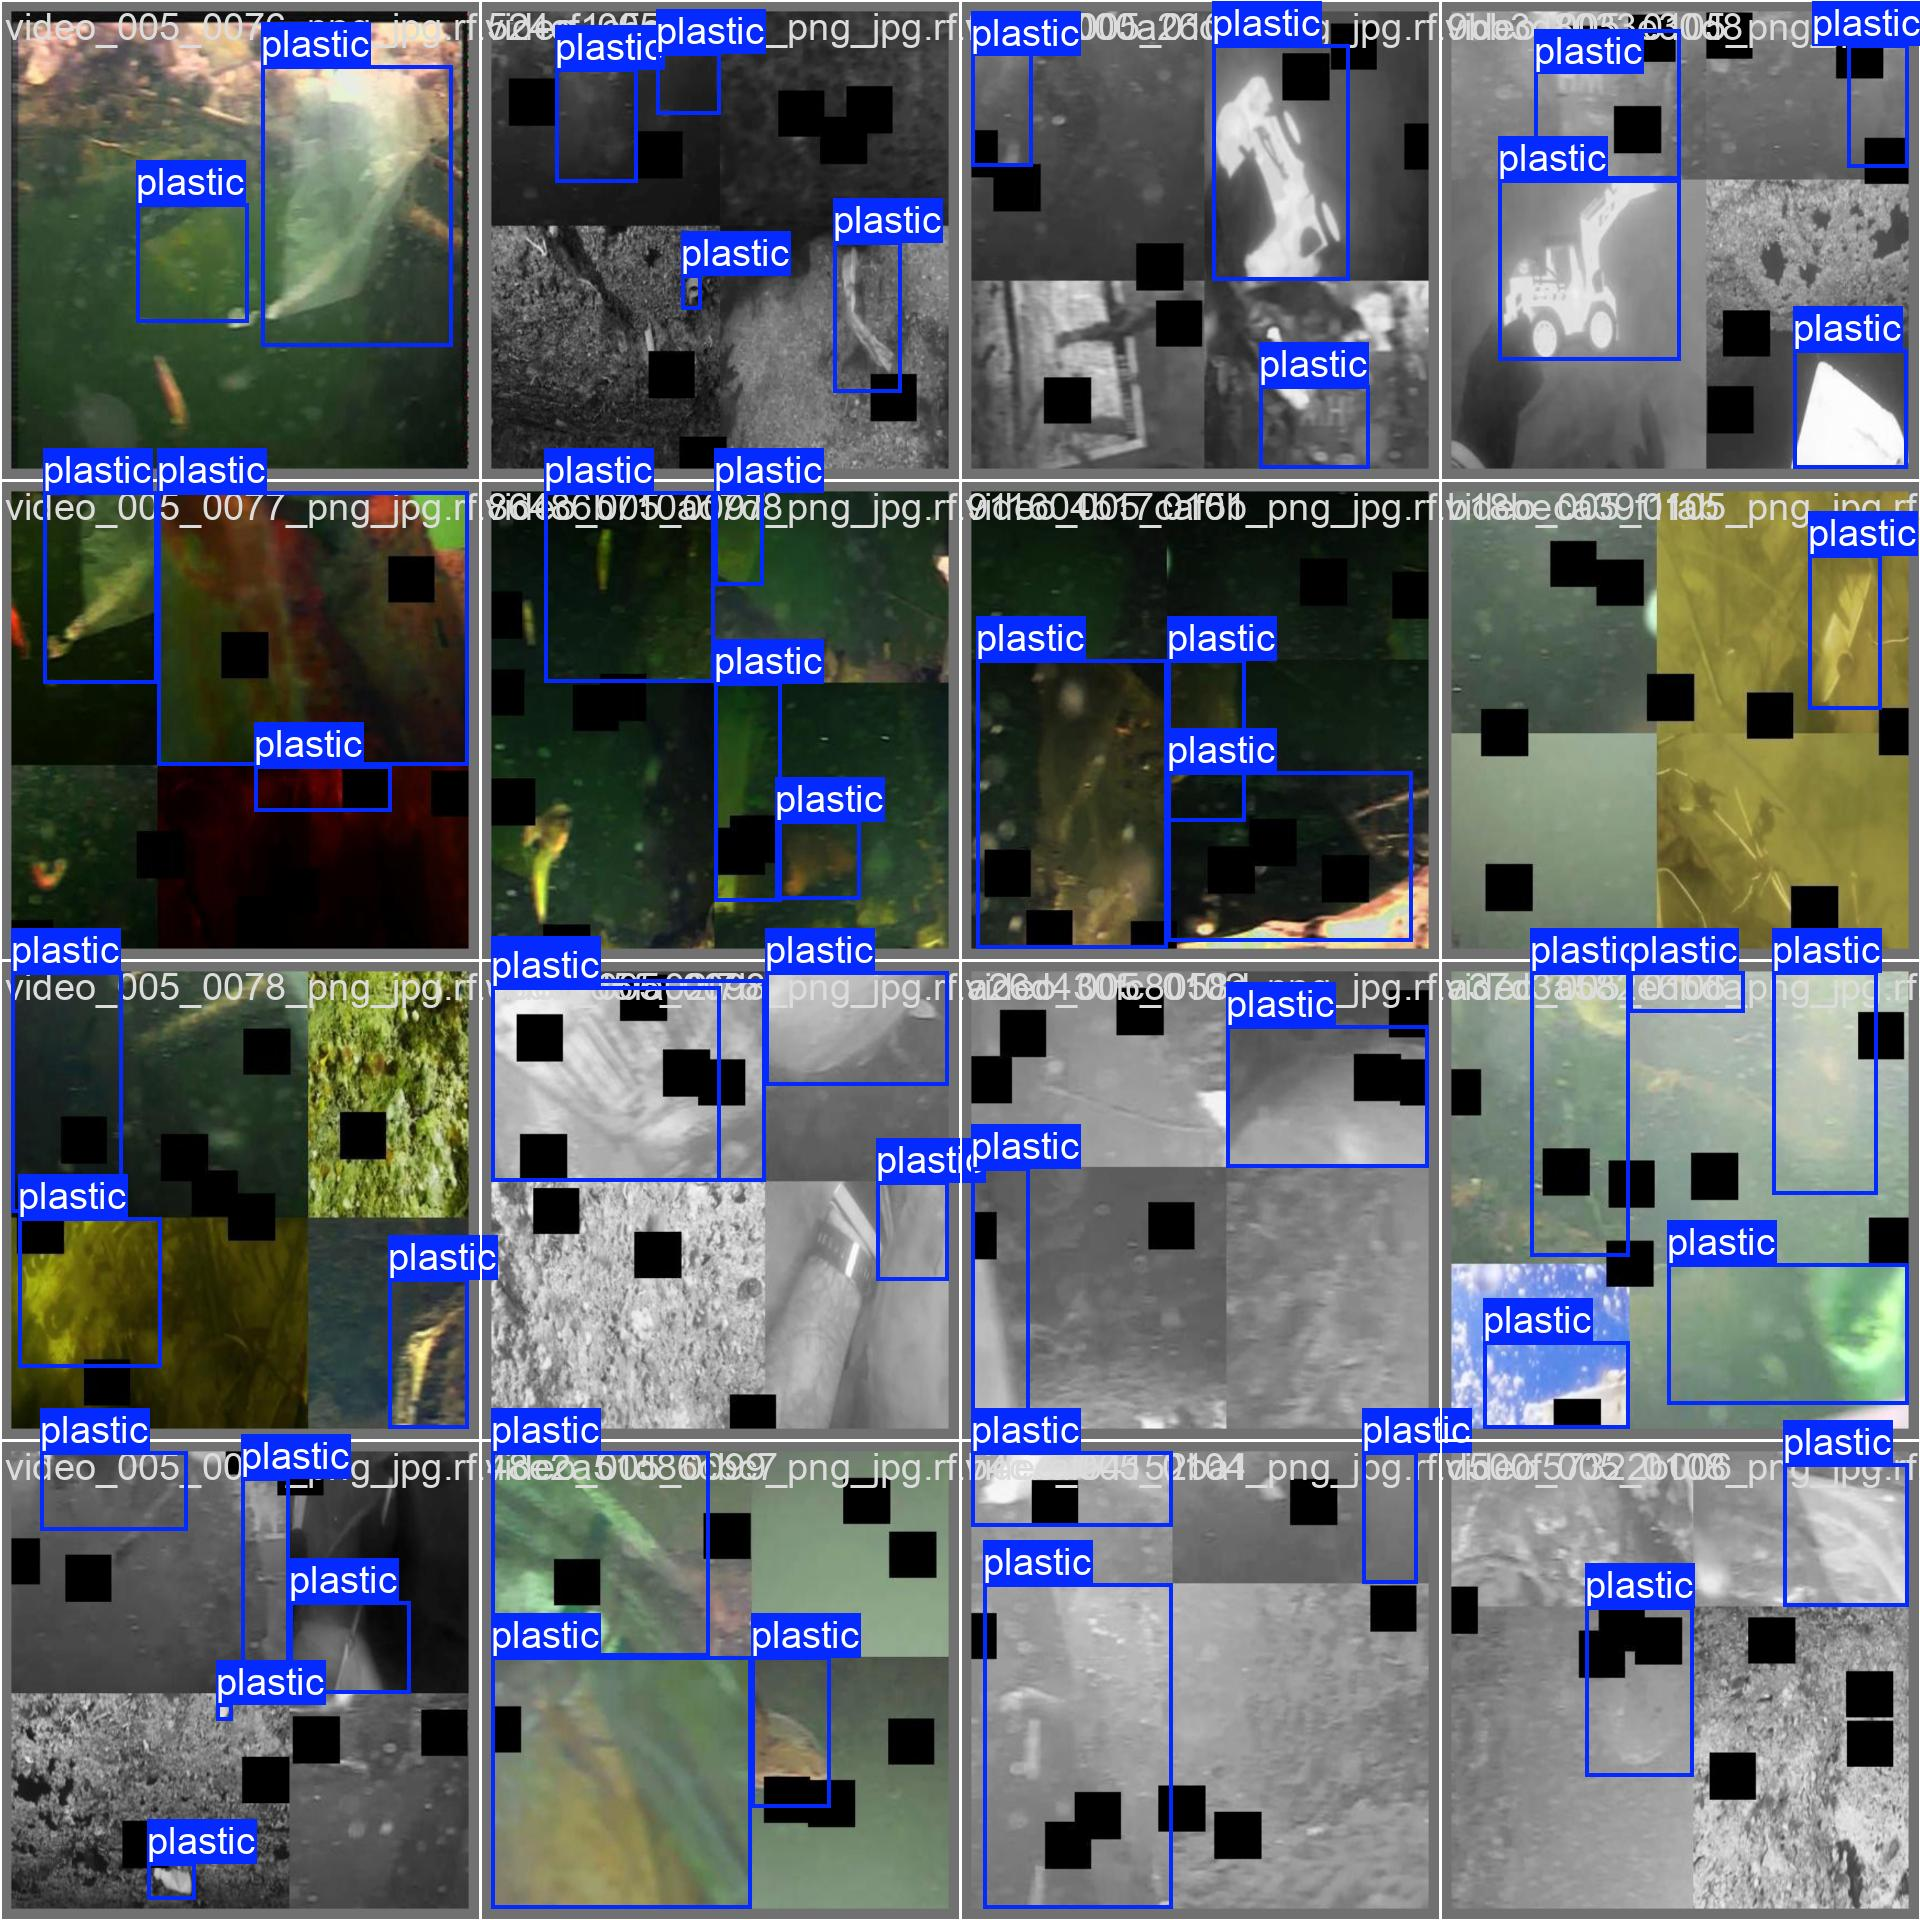

In [ ]:
from IPython.display import Image

# Display the image with a smaller size
Image("/content/runs/detect/train2/val_batch2_labels.jpg", width=500)  # Adjust the width as needed